In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap

# Loading/prepping data

In [2]:
path = r"C:\Users\matta\Desktop\Documents\Python\Geolocation\climate_data\working_data\climate_data_complete.parquet"

In [3]:
df = pd.read_parquet(path)
df.shape

(470320, 171)

In [4]:
df = pd.DataFrame(df[df.state == 'AZ'].reset_index(drop=True))
df.shape

(16631, 171)

In [5]:
ecoregions = ['Level_1', 'Level_2', 'Level_3', 'Level_4', 'ECO_NAME']

In [6]:
for i in ecoregions:
    df[i] = df[i].astype('str')

In [7]:
for i in ecoregions:
    print(df[i].value_counts())
    print()

Level_1
10  NORTH AMERICAN DESERTS         11040
13  TEMPERATE SIERRAS               3476
12  SOUTHERN SEMIARID HIGHLANDS     2115
Name: count, dtype: int64

Level_2
10.2  WARM DESERTS                     5879
10.1  COLD DESERTS                     5161
13.1  UPPER GILA MOUNTAINS             3476
12.1  WESTERN SIERRA MADRE PIEDMONT    2115
Name: count, dtype: int64

Level_3
10.2.2  Sonoran Desert                  4931
10.1.7  Arizona/New Mexico Plateau      4629
13.1.1  Arizona/New Mexico Mountains    3476
12.1.1  Madrean Archipelago             2115
10.2.1  Mojave Basin and Range           917
10.1.6  Colorado Plateaus                532
10.2.4  Chihuahuan Desert                 31
Name: count, dtype: int64

Level_4
81k  Arizona Upland/Eastern Sonoran Mountains          1319
81l  Arizona Upland/Eastern Sonoran Basins             1318
81j  Central Sonoran/Colorado Desert Basins            1272
23b  Madrean Lower Montane Woodlands                    906
79a  Apachian Valleys and Low Hil

In [8]:
for i in ecoregions:
    print(i, df[i].nunique())

Level_1 3
Level_2 4
Level_3 7
Level_4 52
ECO_NAME 6


# Plotting Arizona ecoregions

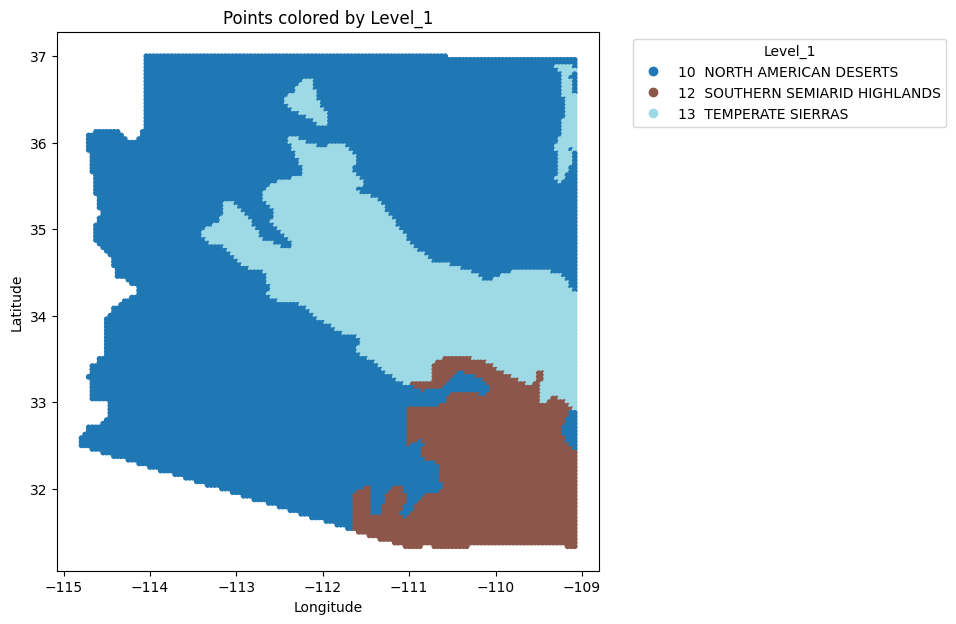

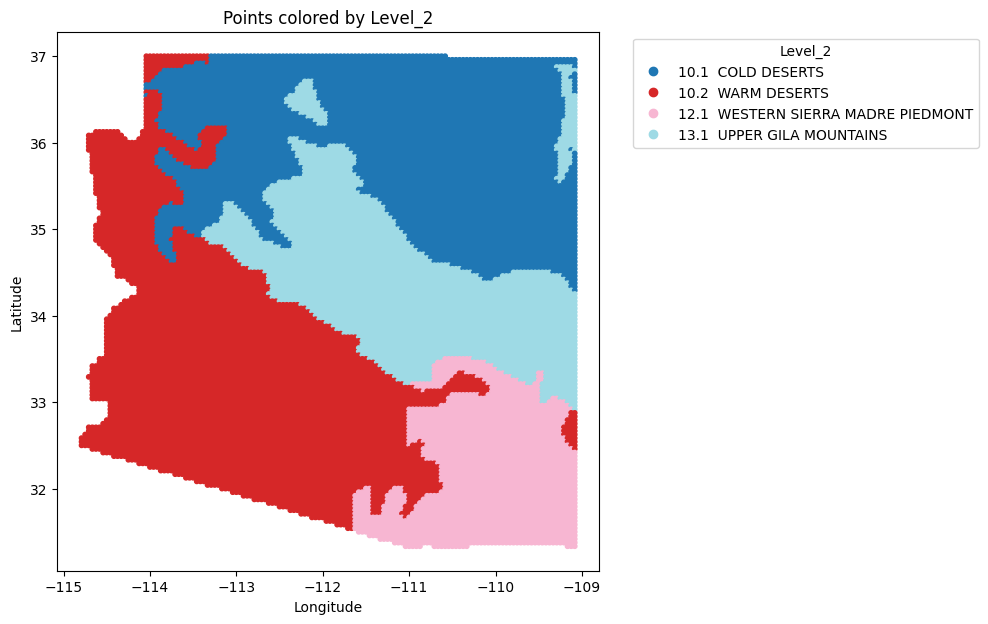

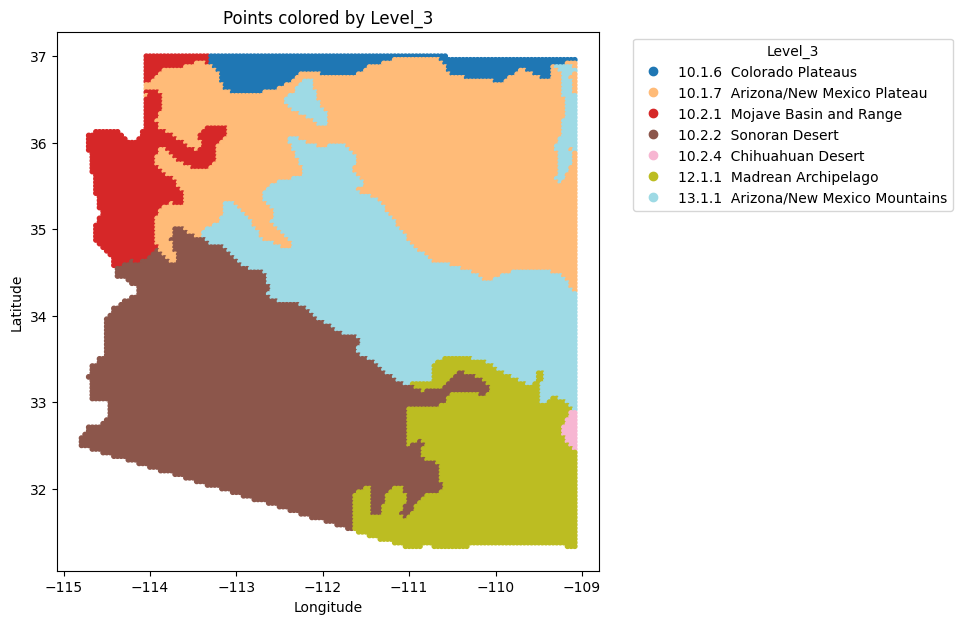

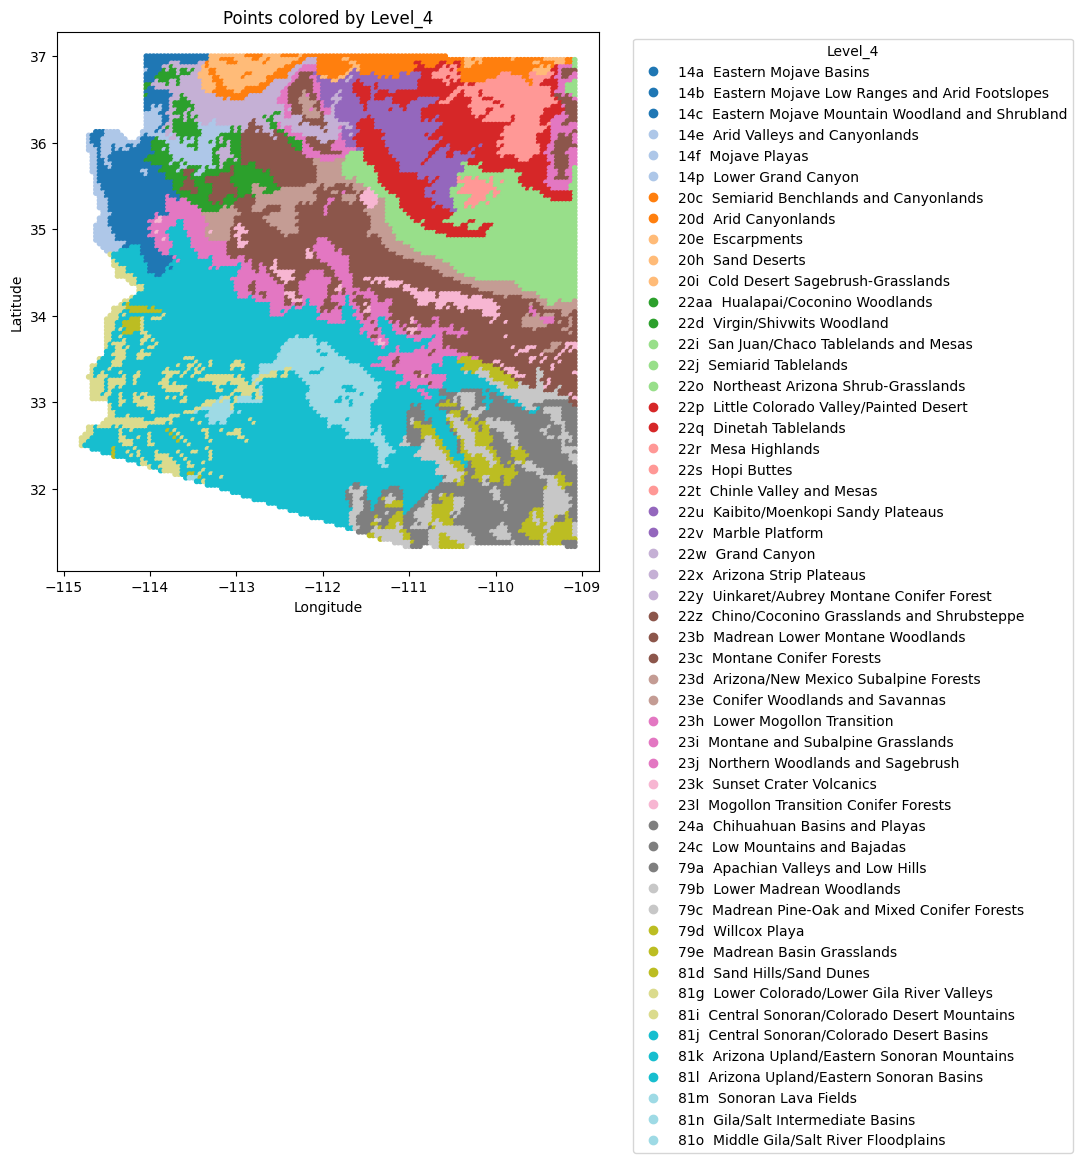

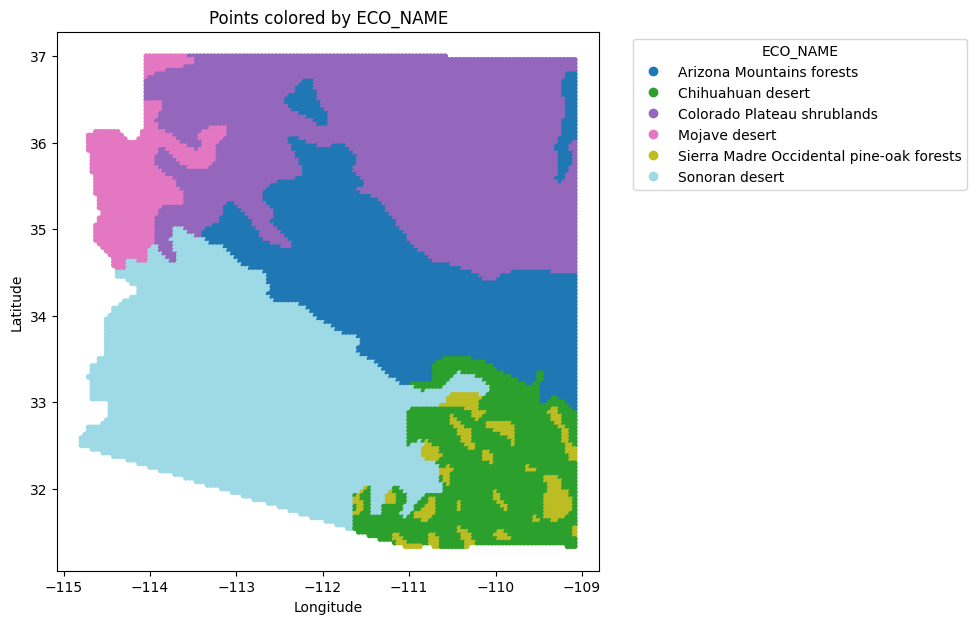

In [9]:
for name in ecoregions:
    fig, ax = plt.subplots(figsize=(7, 7))
    categories = df[name].astype("category")
    codes = categories.cat.codes

    scatter = ax.scatter(
        df["longitude"],
        df["latitude"],
        c=codes,
        s=10,
        alpha=1,
        cmap="tab20")

    handles = []
    labels = categories.cat.categories
    for i, label in enumerate(labels):
        handles.append(
            plt.Line2D(
                [], [], marker='o', linestyle='',
                color=scatter.cmap(scatter.norm(i)),
                markersize=6,
                label=str(label)))

    ax.legend(
        handles=handles,
        title=name,
        bbox_to_anchor=(1.05, 1),
        loc="upper left")

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(f"Points colored by {name}")
    plt.show()

# Climographs of ecoregions

In [10]:
mean_temp_cols = ['jan_meant', 'feb_meant','mar_meant','apr_meant', 
                  'may_meant', 'jun_meant','jul_meant','aug_meant',
                  'sep_meant','oct_meant','nov_meant','dec_meant']

max_temp_cols = ['jan_maxt', 'feb_maxt','mar_maxt','apr_maxt', 
                  'may_maxt', 'jun_maxt','jul_maxt','aug_maxt',
                  'sep_maxt','oct_maxt','nov_maxt','dec_maxt']

min_temp_cols = ['jan_tmin', 'feb_tmin','mar_tmin','apr_tmin', 
                  'may_tmin', 'jun_tmin','jul_tmin','aug_tmin',
                  'sep_tmin','oct_tmin','nov_tmin','dec_tmin']

mean_precip_cols = ['jan_precip', 'feb_precip','mar_precip','apr_precip', 
                    'may_precip', 'jun_precip','jul_precip','aug_precip',
                    'sep_precip','oct_precip','nov_precip','dec_precip']

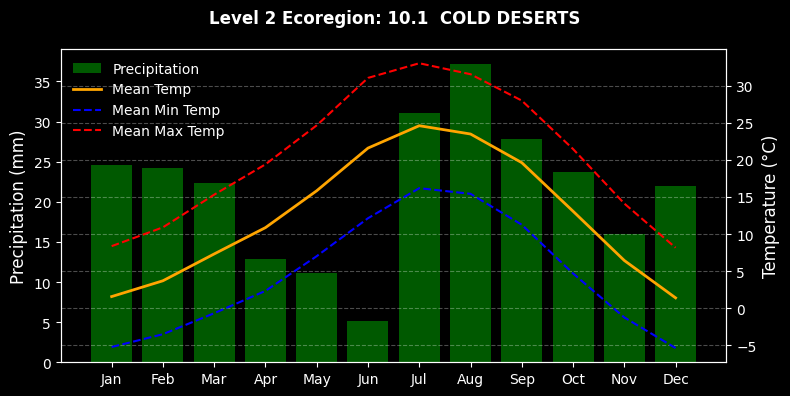

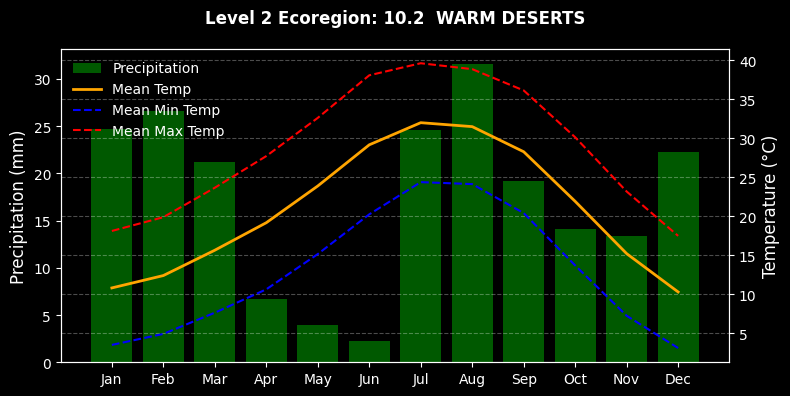

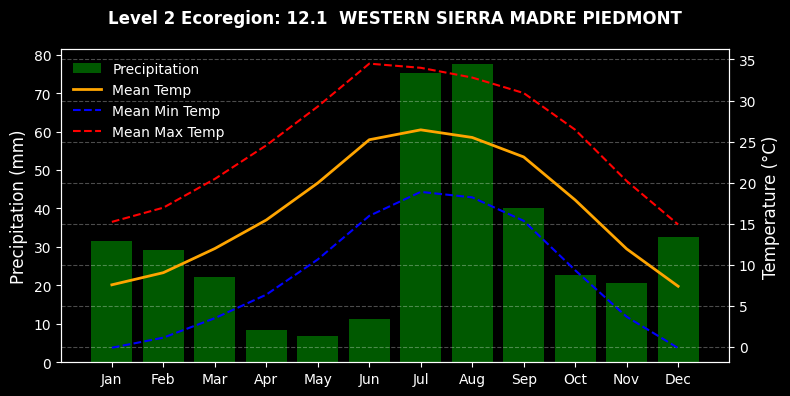

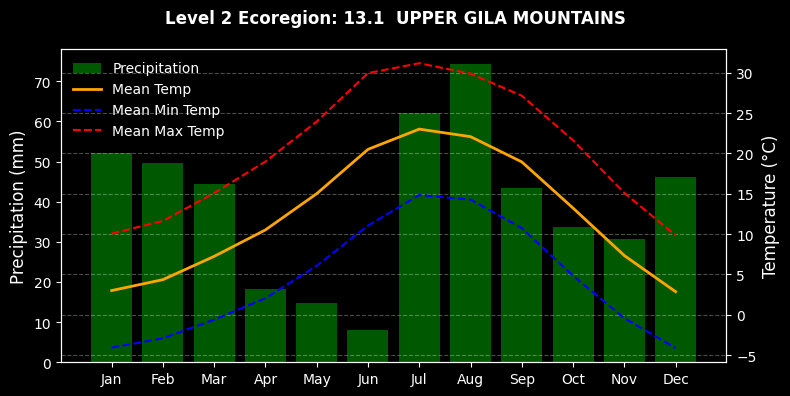

In [11]:
means = df.groupby("Level_2", observed=True)[df.select_dtypes("number").columns].mean().reset_index()

for i in means.Level_2.unique():
    eco = means[means.Level_2 == i]

    mean_temps = eco[mean_temp_cols].values[0]
    min_temps  = eco[min_temp_cols].values[0]
    max_temps  = eco[max_temp_cols].values[0]
    precip     = eco[mean_precip_cols].values[0] 

    months = ['Jan','Feb','Mar','Apr','May','Jun',
              'Jul','Aug','Sep','Oct','Nov','Dec']

    plt.style.use("dark_background")
    fig, ax1 = plt.subplots(figsize=(8,4))

    # Precipitation barplot
    ax1.bar(months, precip, alpha=0.7, color="green", label="Precipitation")
    ax1.set_ylabel("Precipitation (mm)", fontsize=12, color="white")
    ax1.grid(False)

    # Temperature lines
    ax2 = ax1.twinx()
    ax2.plot(months, mean_temps, label="Mean Temp", color="orange", linewidth=2)
    ax2.plot(months, min_temps,  label="Mean Min Temp", color="blue",   linestyle="--")
    ax2.plot(months, max_temps,  label="Mean Max Temp", color="red",    linestyle="--")
    ax2.set_ylabel("Temperature (°C)", fontsize=12, color="white")
    ax2.grid(True, linestyle="--", alpha=0.3)

    fig.suptitle(f"Level 2 Ecoregion: {i}", fontsize=12, weight="bold")
    lines, labels = ax1.get_legend_handles_labels()
    bars, blabels = ax2.get_legend_handles_labels()
    ax1.legend(lines + bars, labels + blabels, loc="upper left", frameon=False)

    plt.tight_layout()
    plt.show()

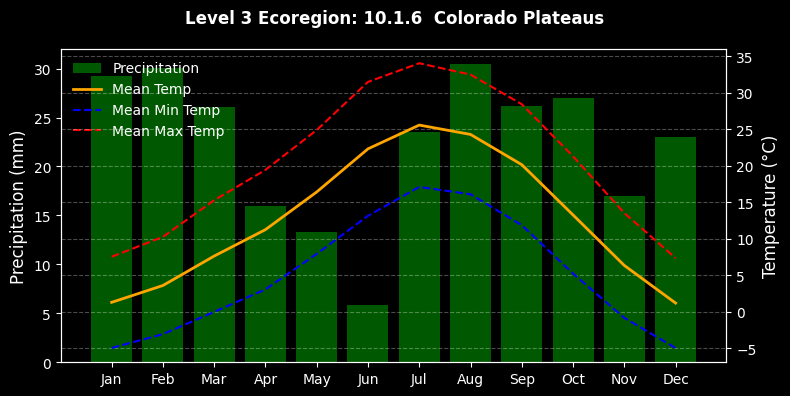

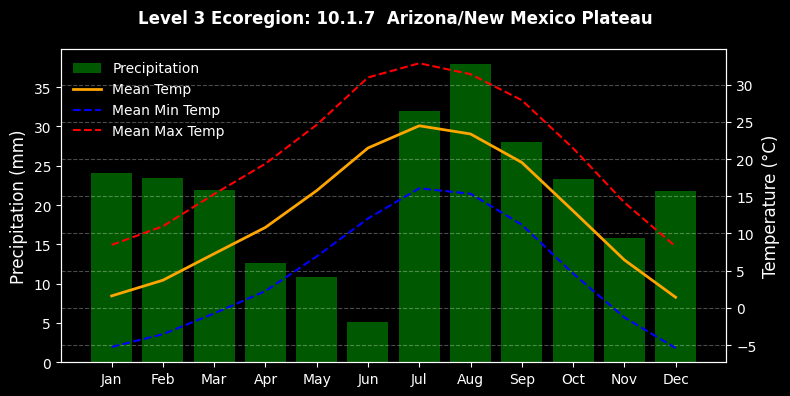

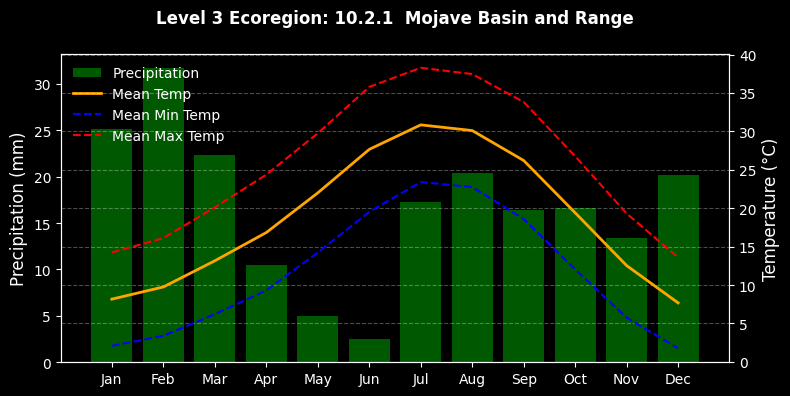

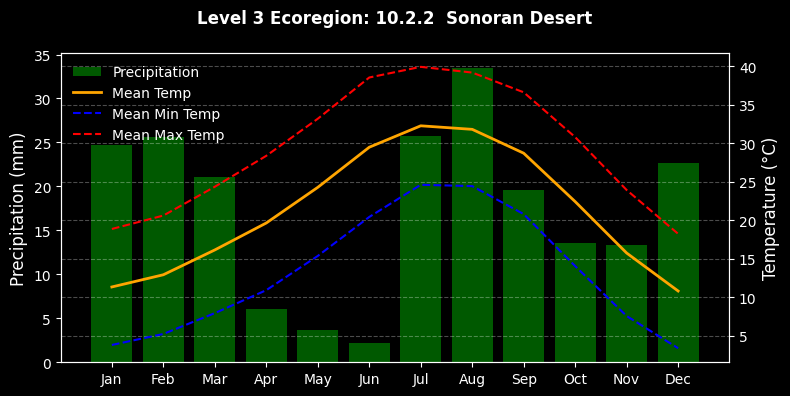

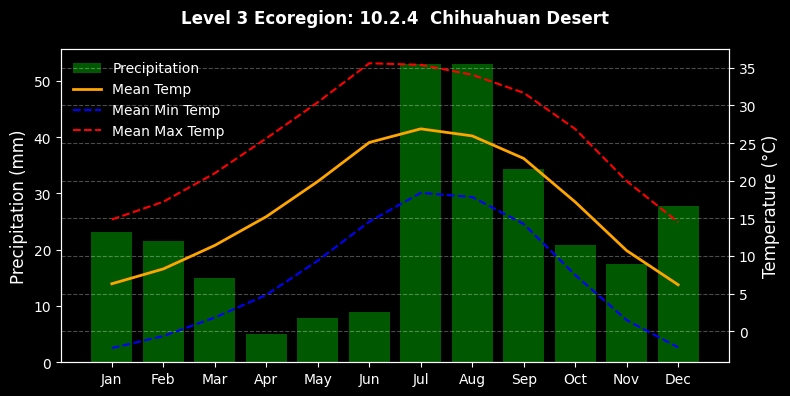

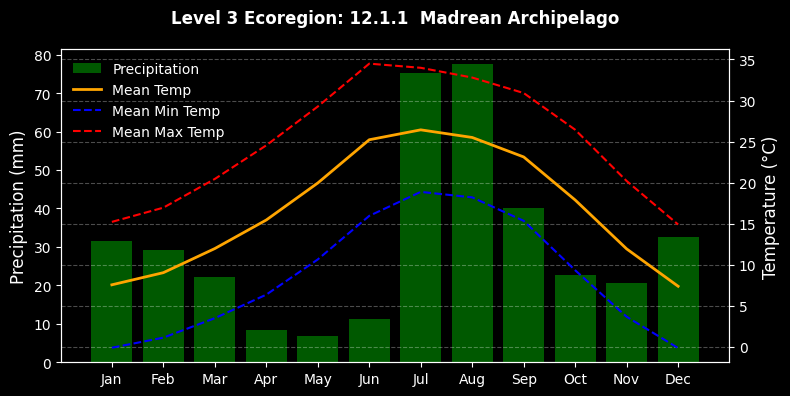

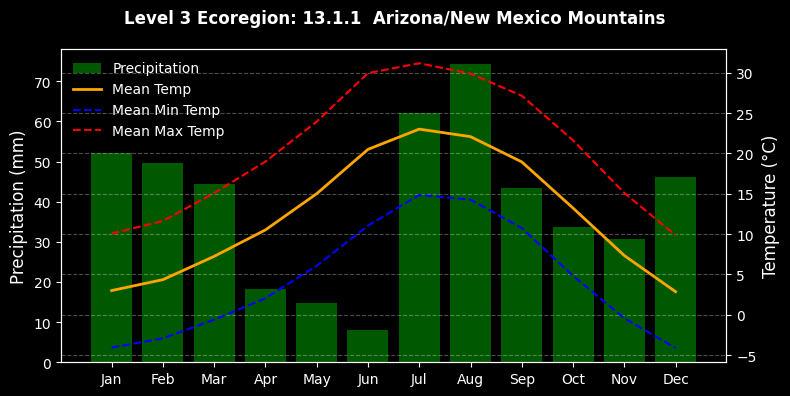

In [12]:
means = df.groupby("Level_3", observed=True)[df.select_dtypes("number").columns].mean().reset_index()

for i in means.Level_3.unique():
    eco = means[means.Level_3 == i]

    mean_temps = eco[mean_temp_cols].values[0]
    min_temps  = eco[min_temp_cols].values[0]
    max_temps  = eco[max_temp_cols].values[0]
    precip     = eco[mean_precip_cols].values[0] 

    months = ['Jan','Feb','Mar','Apr','May','Jun',
              'Jul','Aug','Sep','Oct','Nov','Dec']

    plt.style.use("dark_background")
    fig, ax1 = plt.subplots(figsize=(8,4))

    # Precipitation barplot
    ax1.bar(months, precip, alpha=0.7, color="green", label="Precipitation")
    ax1.set_ylabel("Precipitation (mm)", fontsize=12, color="white")
    ax1.grid(False)

    # Temperature lines
    ax2 = ax1.twinx()
    ax2.plot(months, mean_temps, label="Mean Temp", color="orange", linewidth=2)
    ax2.plot(months, min_temps,  label="Mean Min Temp", color="blue",   linestyle="--")
    ax2.plot(months, max_temps,  label="Mean Max Temp", color="red",    linestyle="--")
    ax2.set_ylabel("Temperature (°C)", fontsize=12, color="white")
    ax2.grid(True, linestyle="--", alpha=0.3)

    fig.suptitle(f"Level 3 Ecoregion: {i}", fontsize=12, weight="bold")
    lines, labels = ax1.get_legend_handles_labels()
    bars, blabels = ax2.get_legend_handles_labels()
    ax1.legend(lines + bars, labels + blabels, loc="upper left", frameon=False)

    plt.tight_layout()
    plt.show()

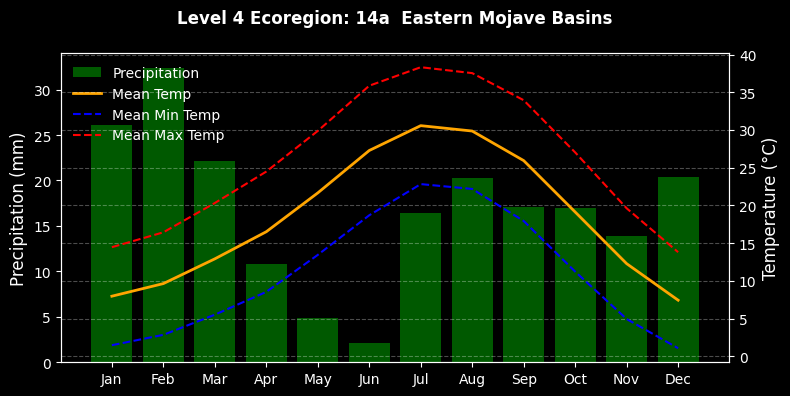

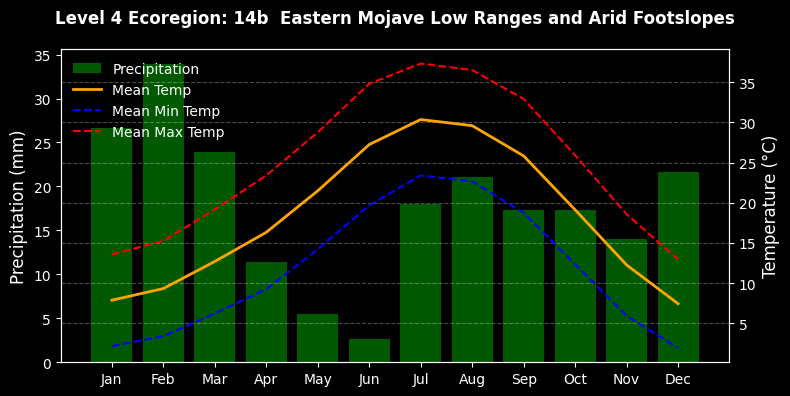

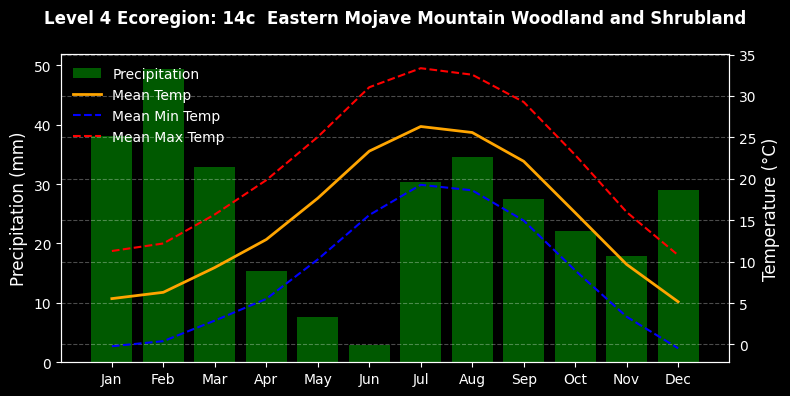

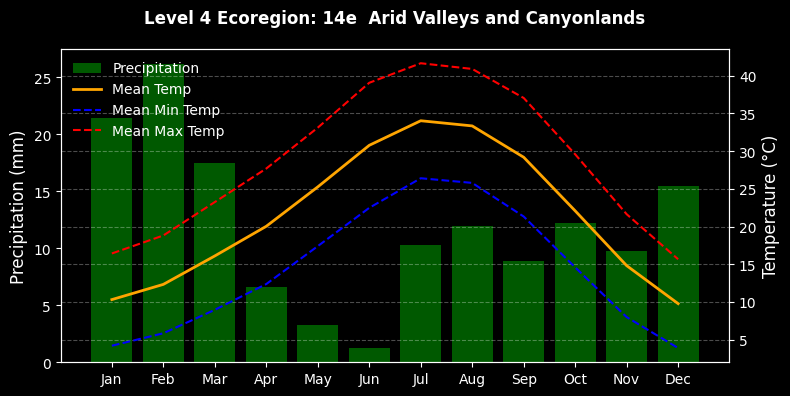

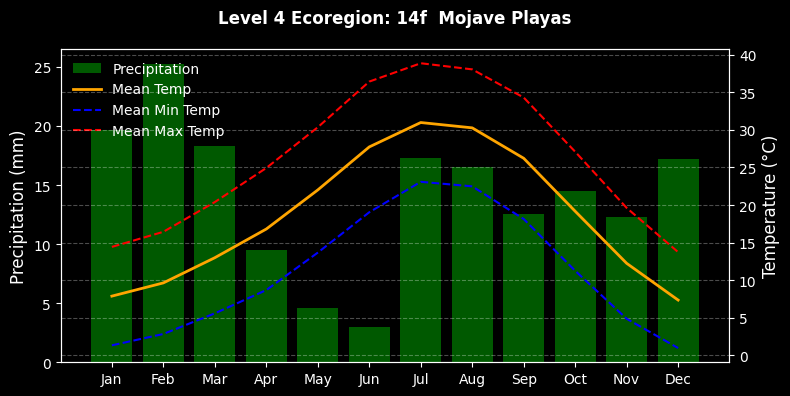

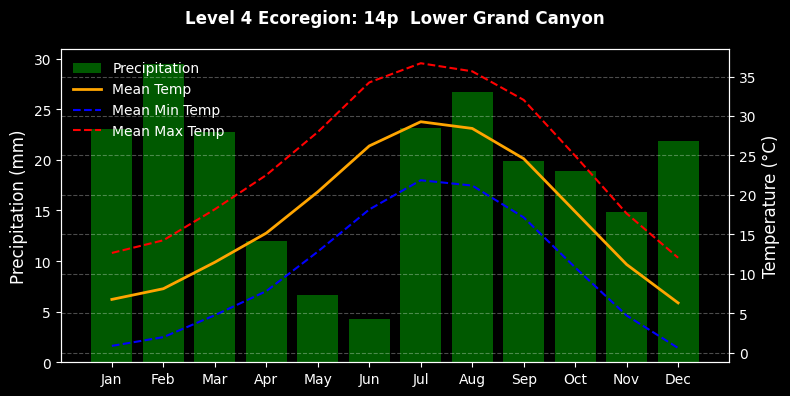

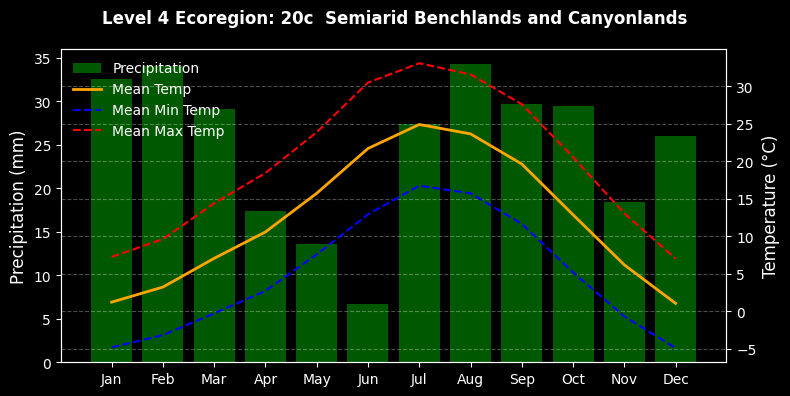

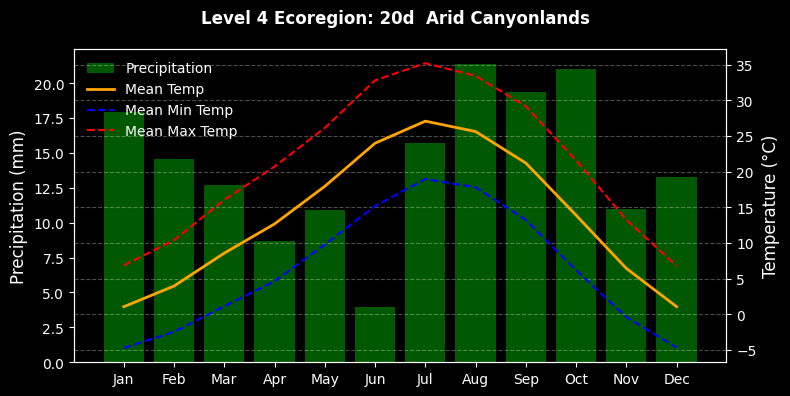

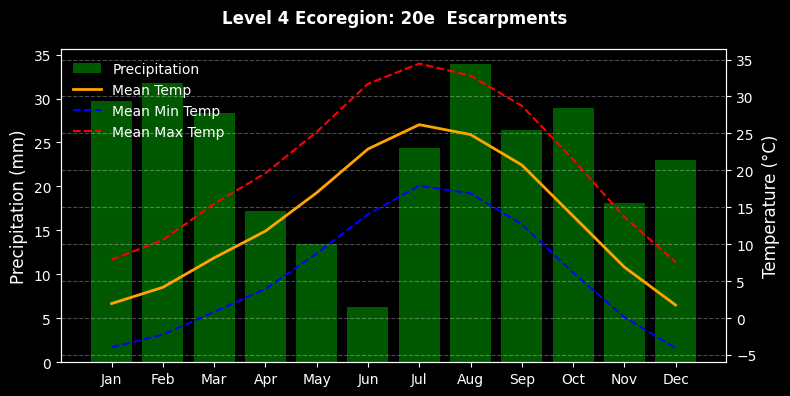

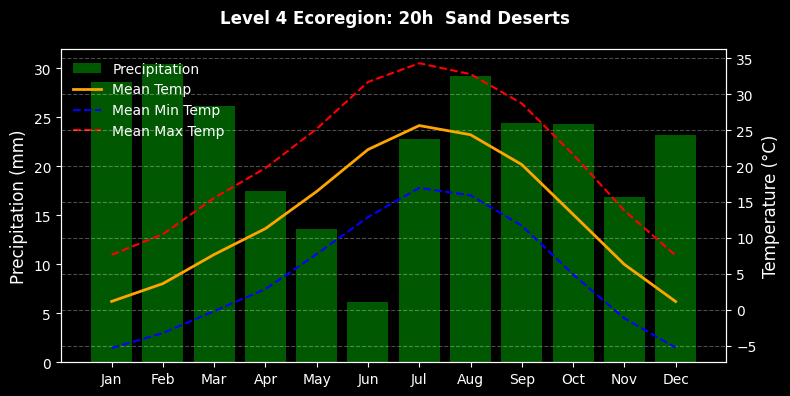

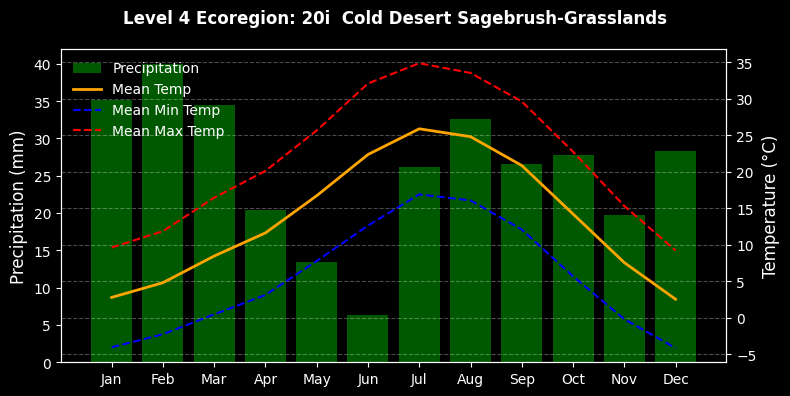

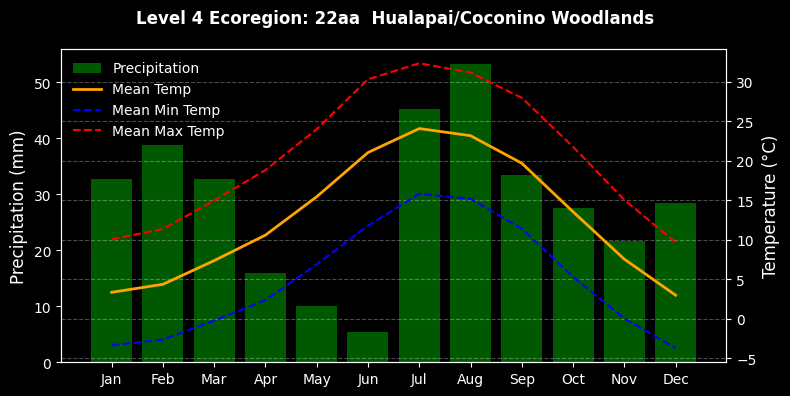

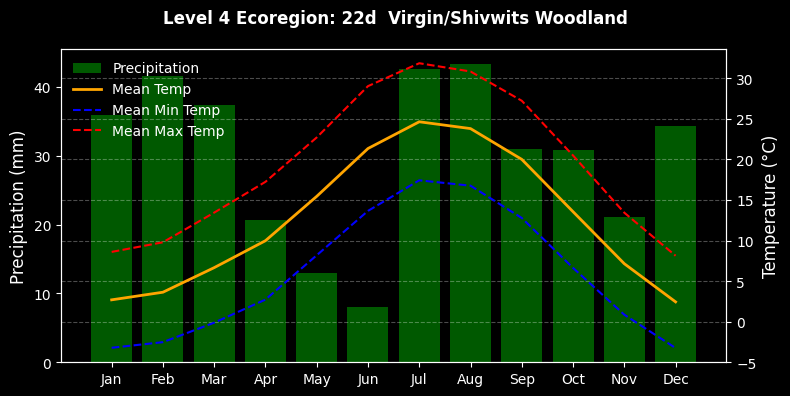

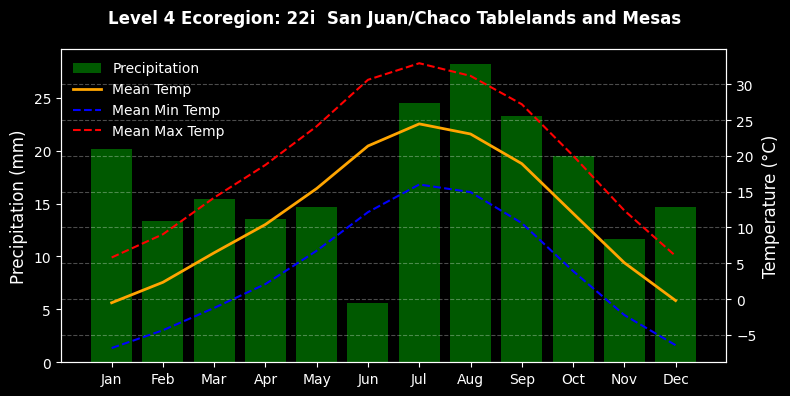

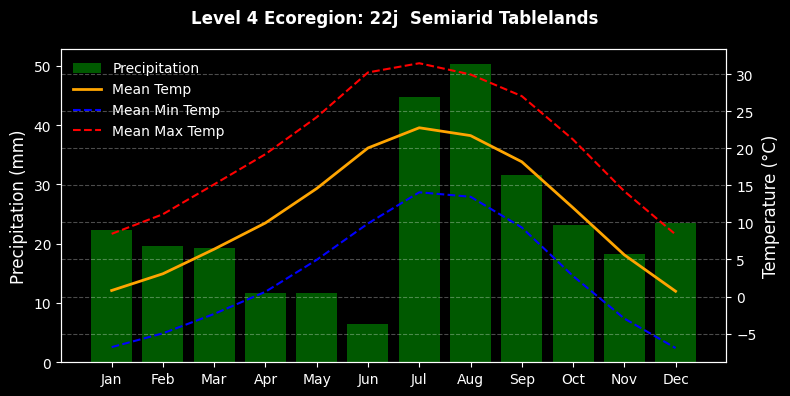

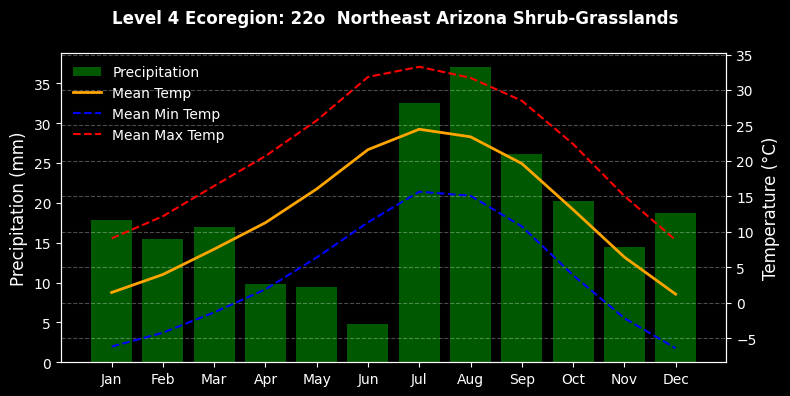

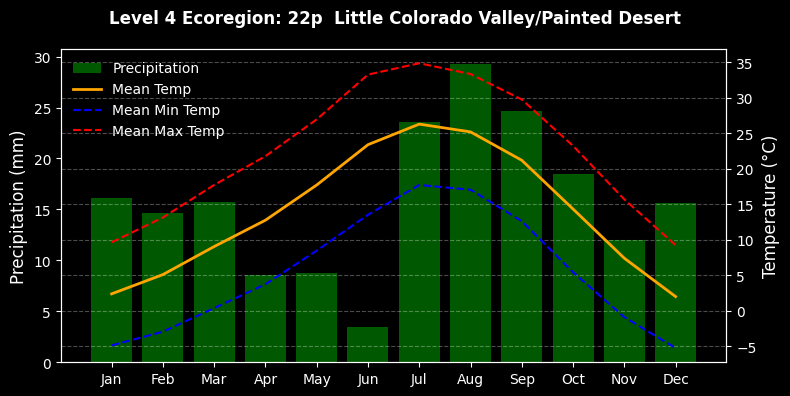

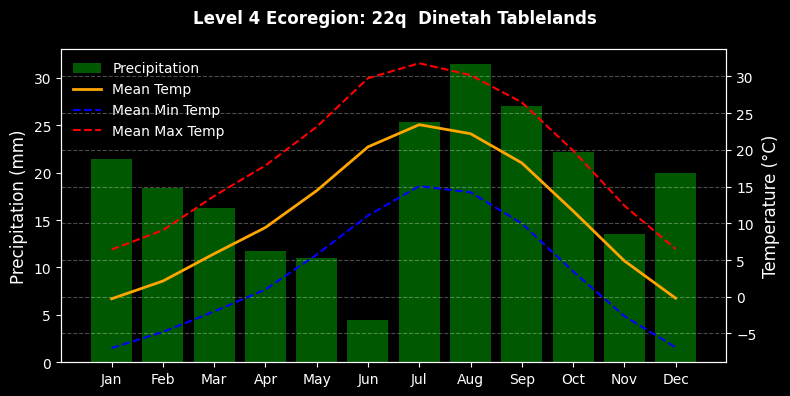

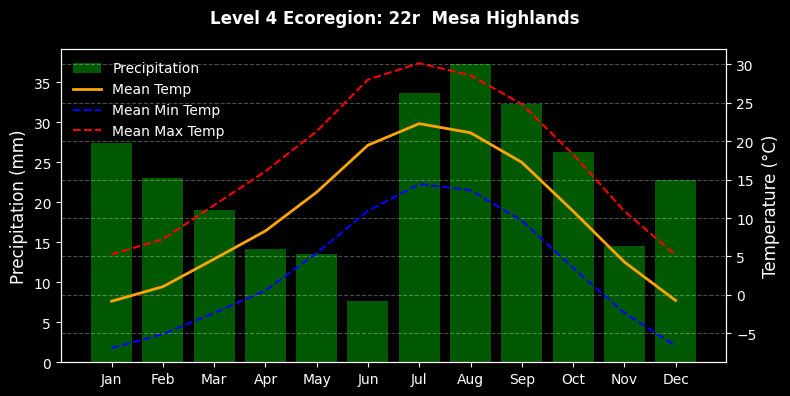

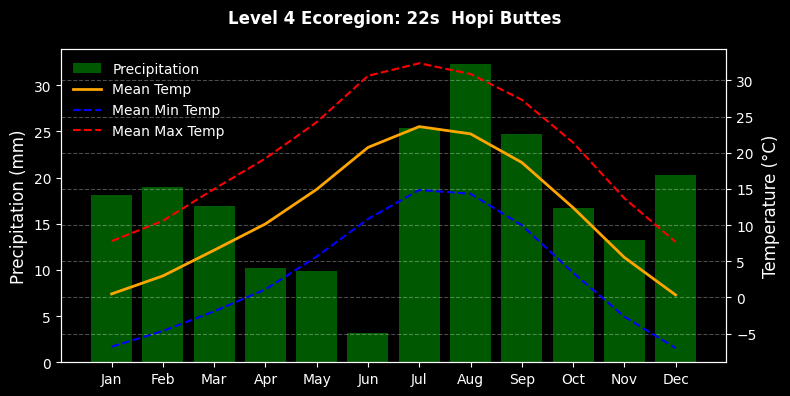

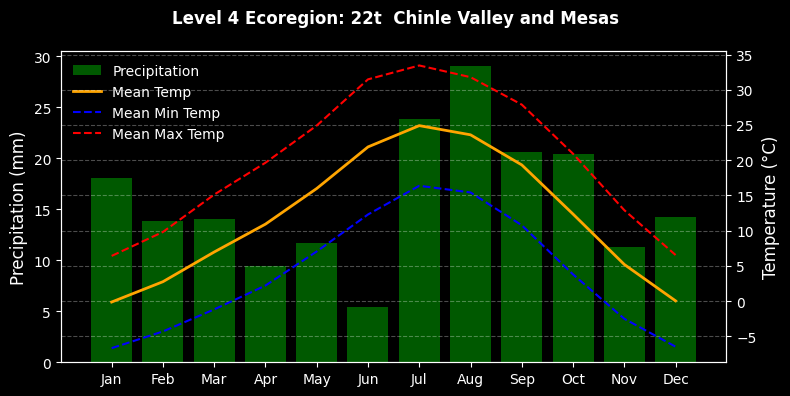

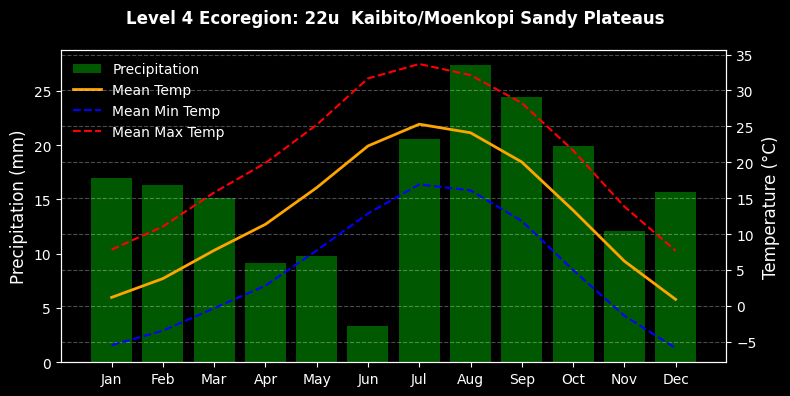

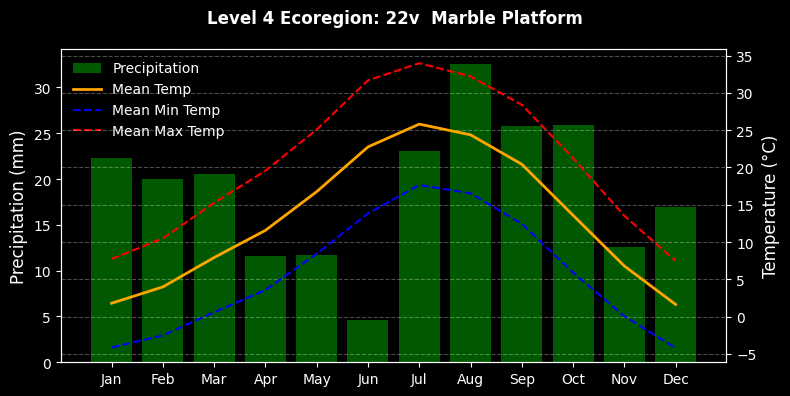

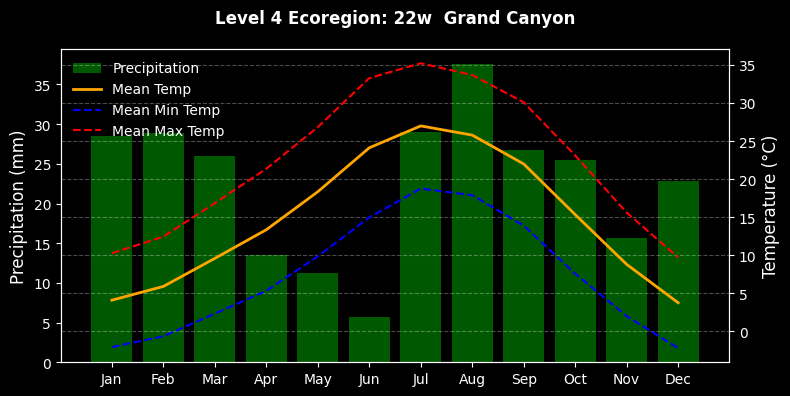

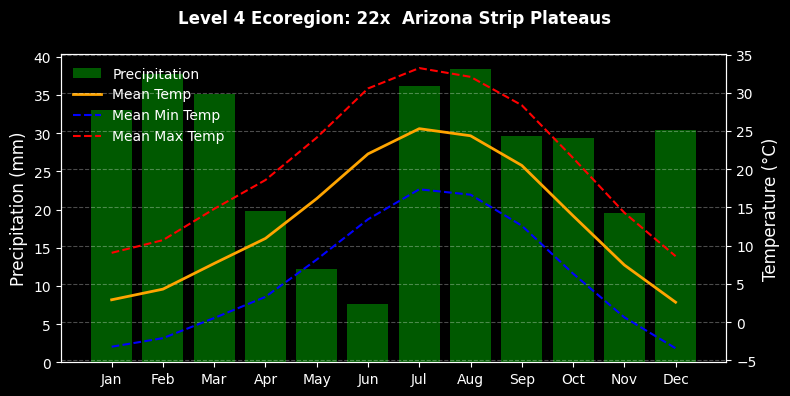

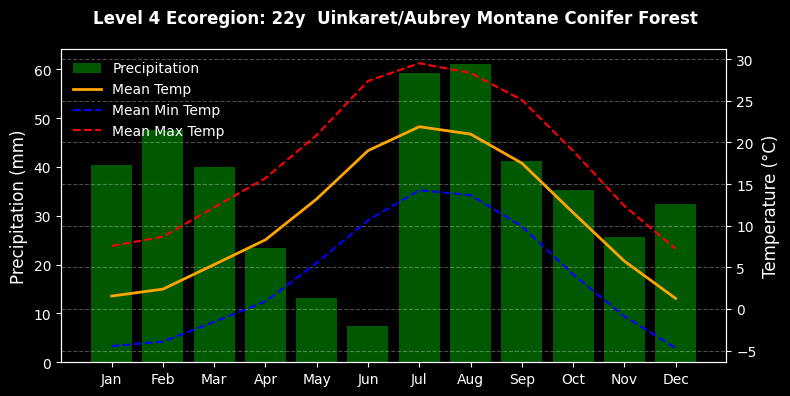

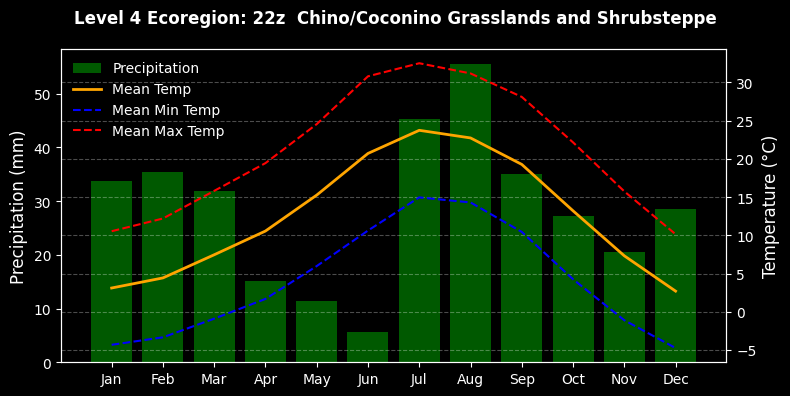

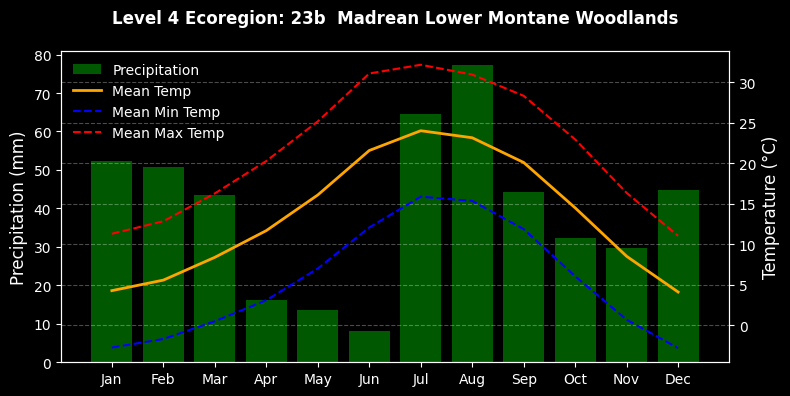

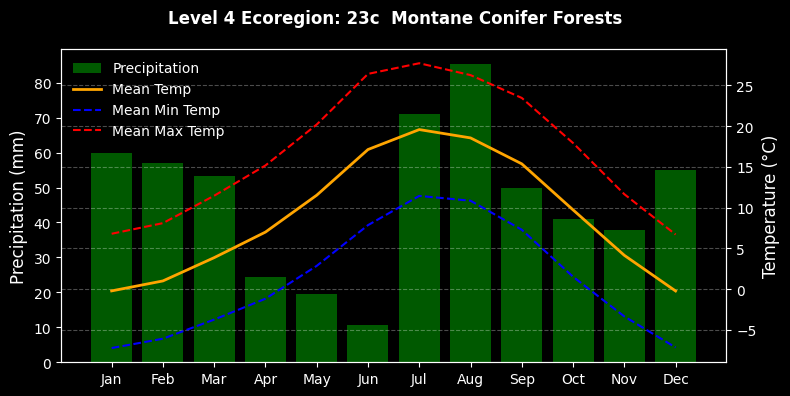

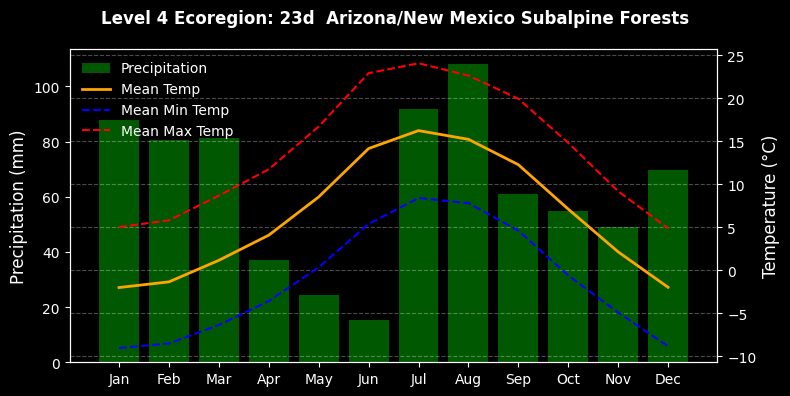

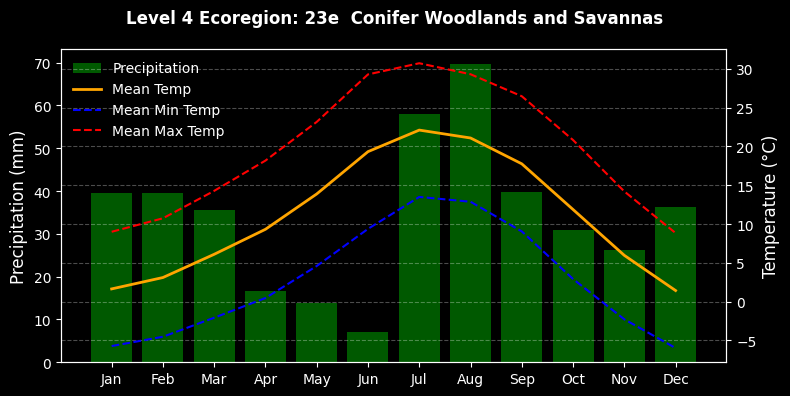

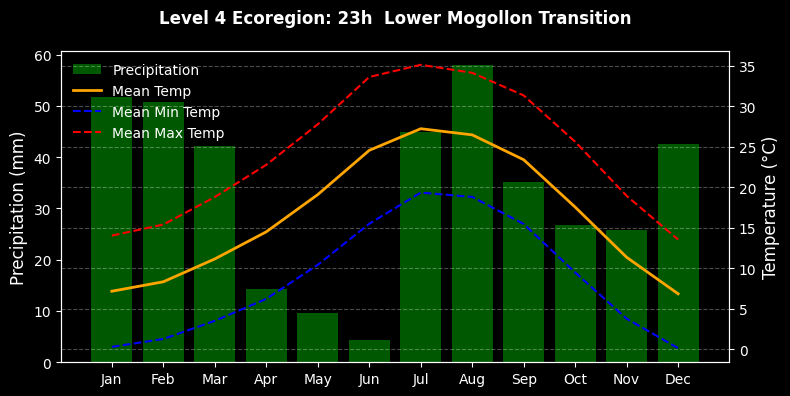

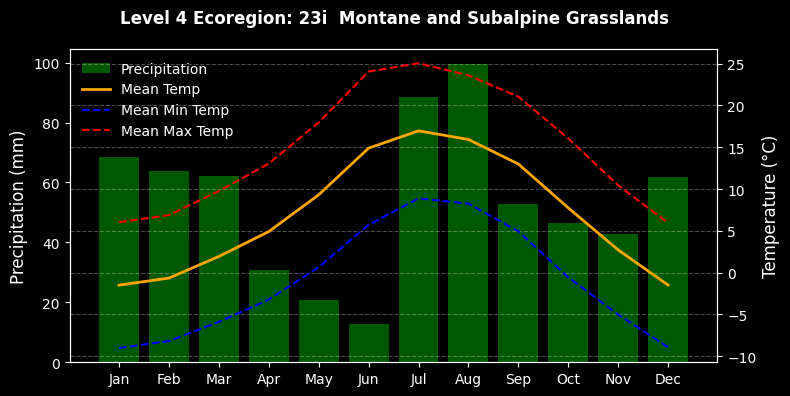

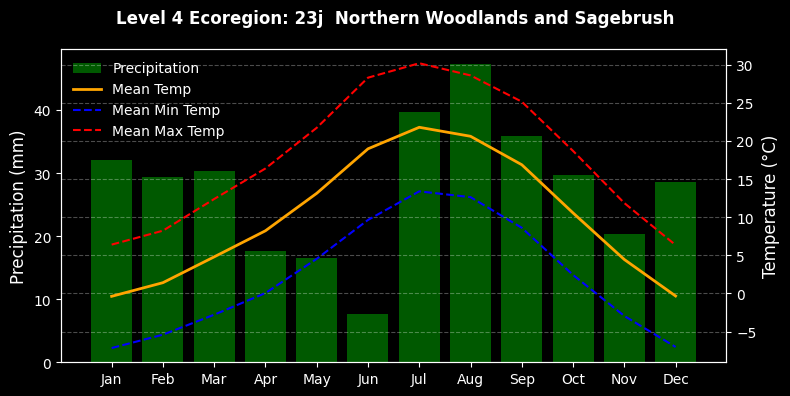

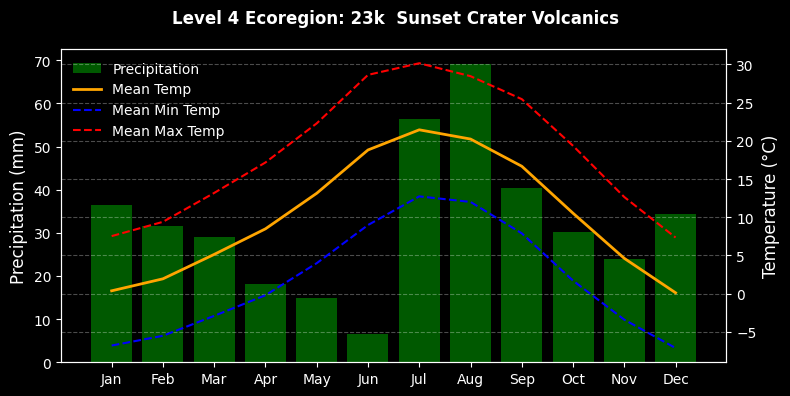

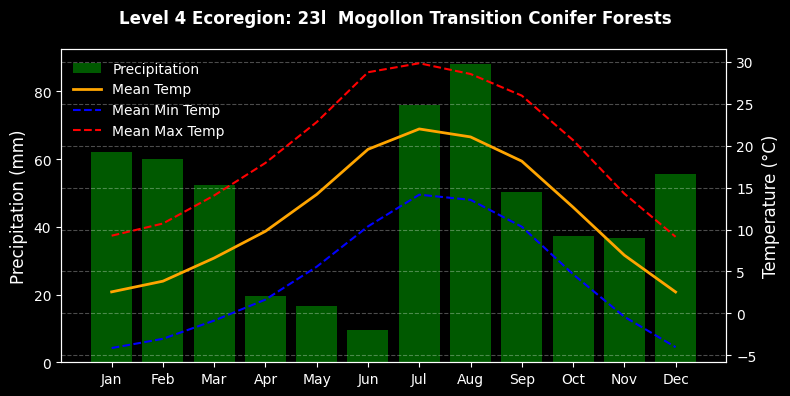

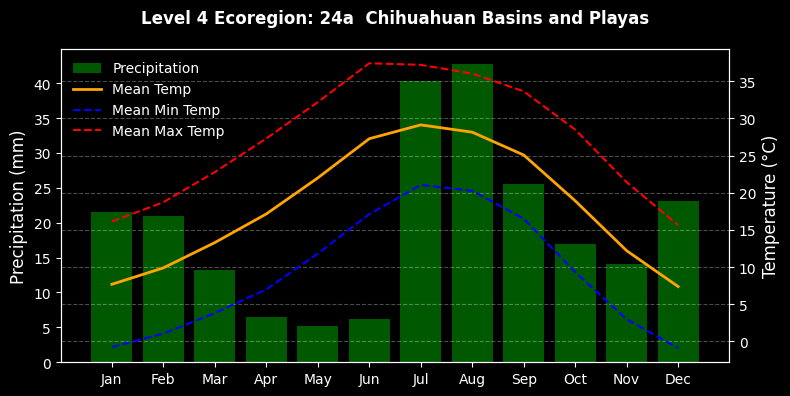

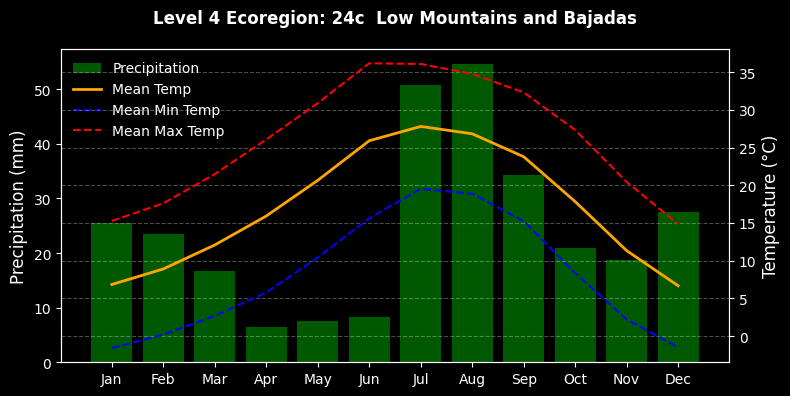

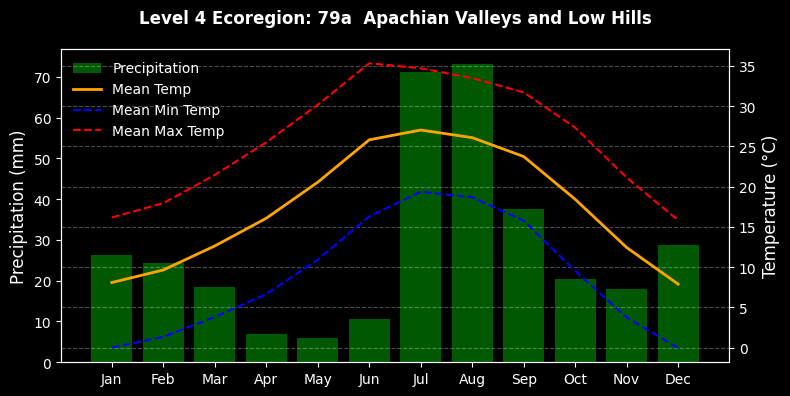

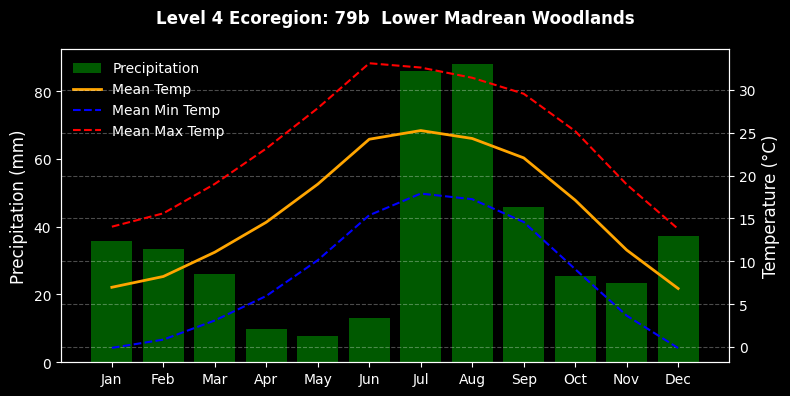

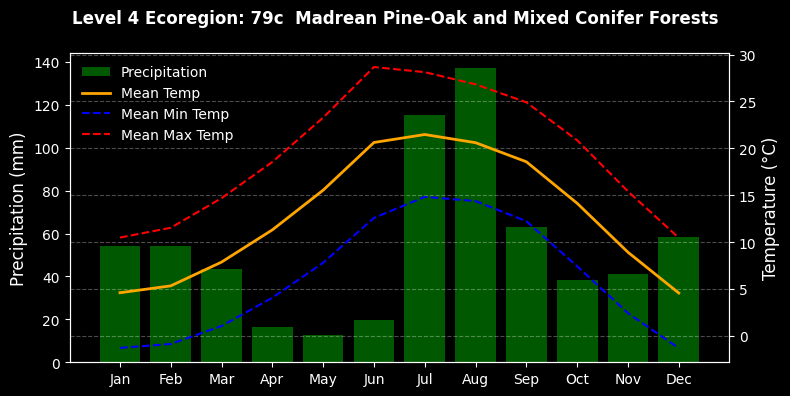

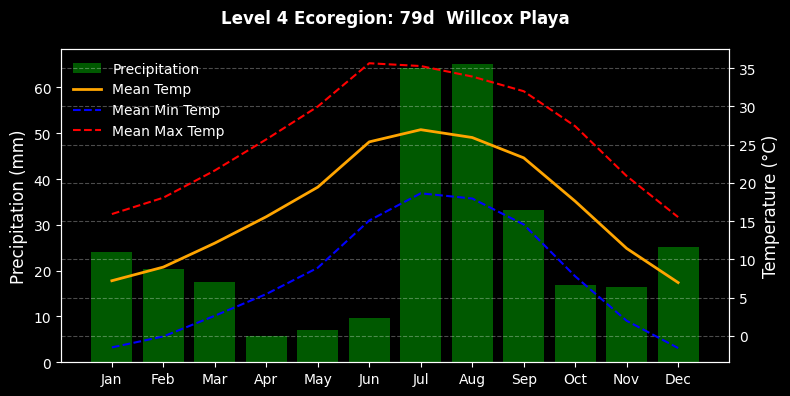

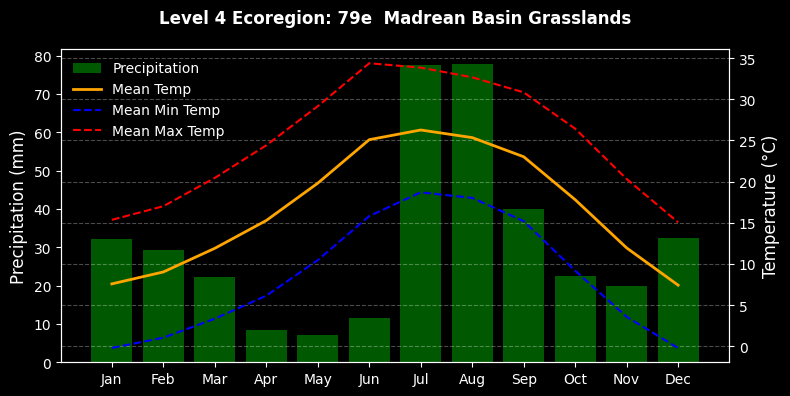

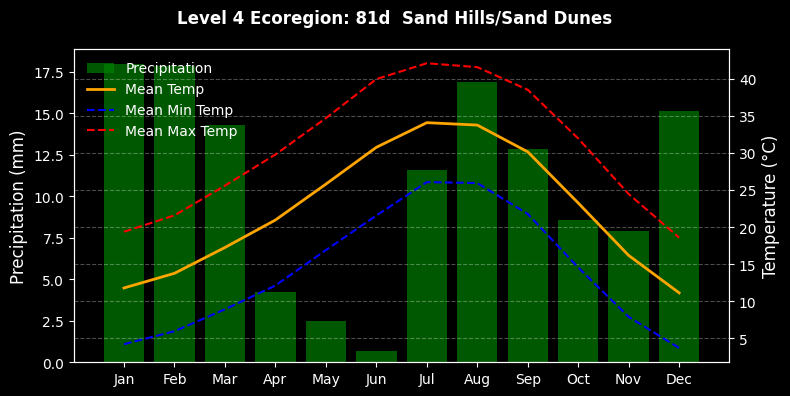

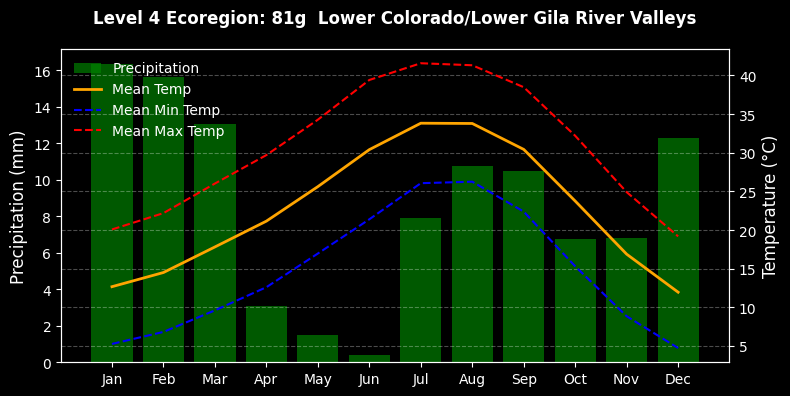

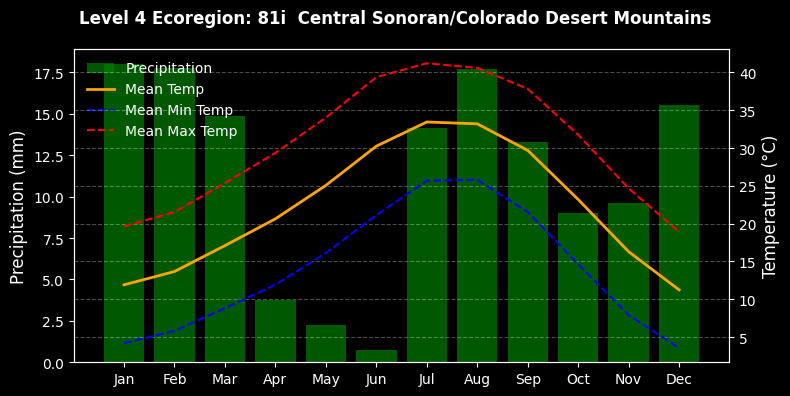

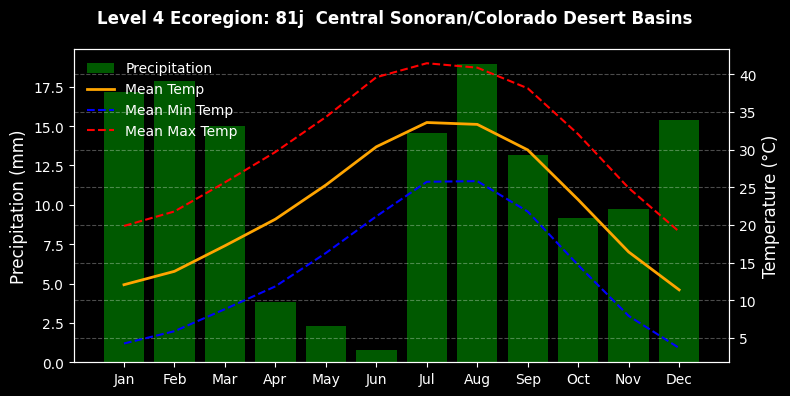

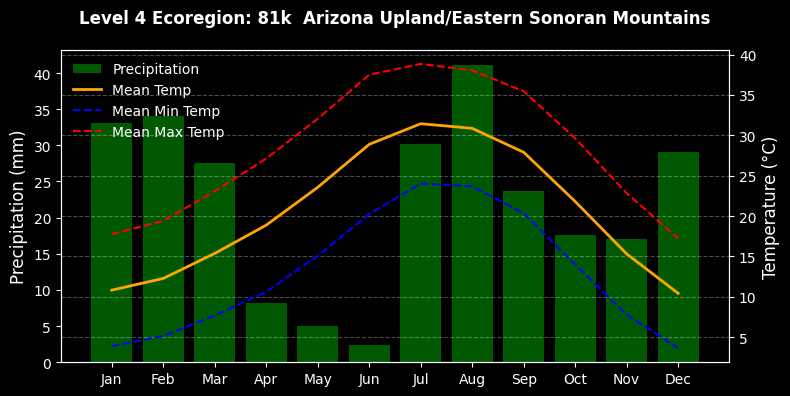

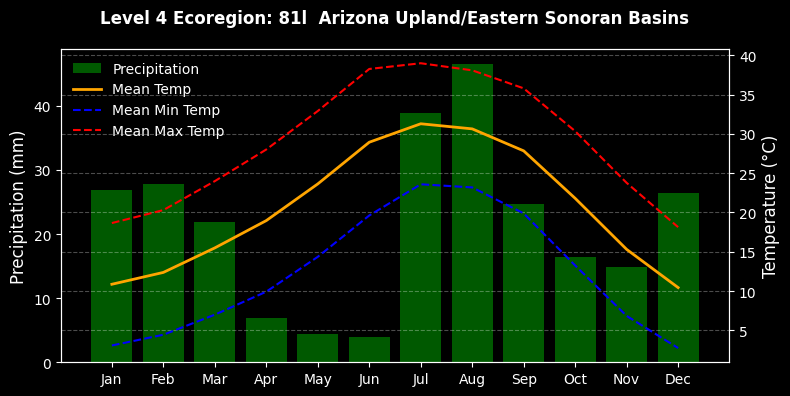

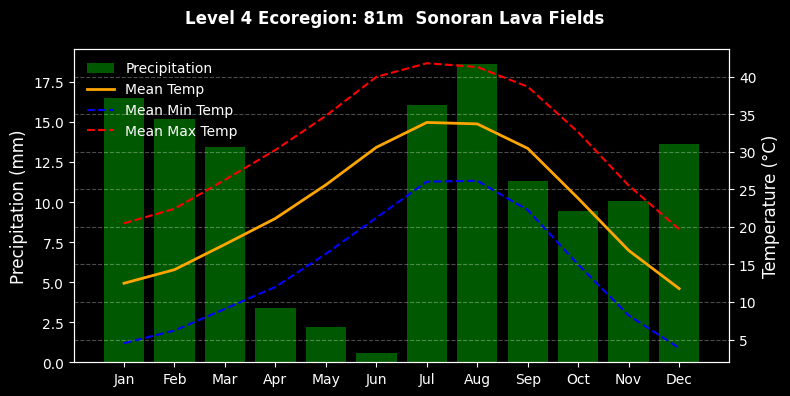

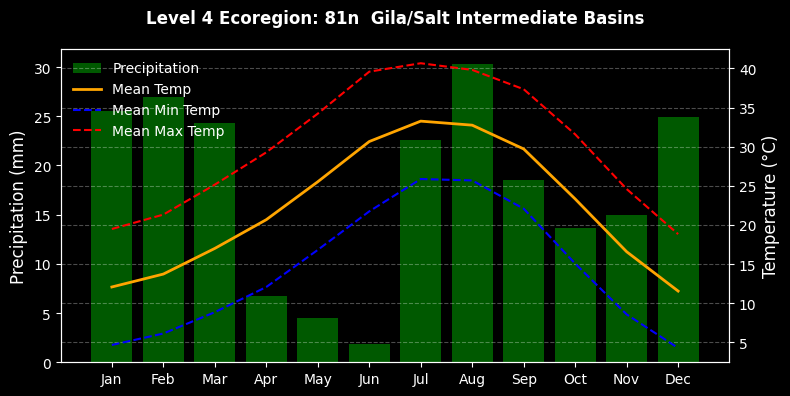

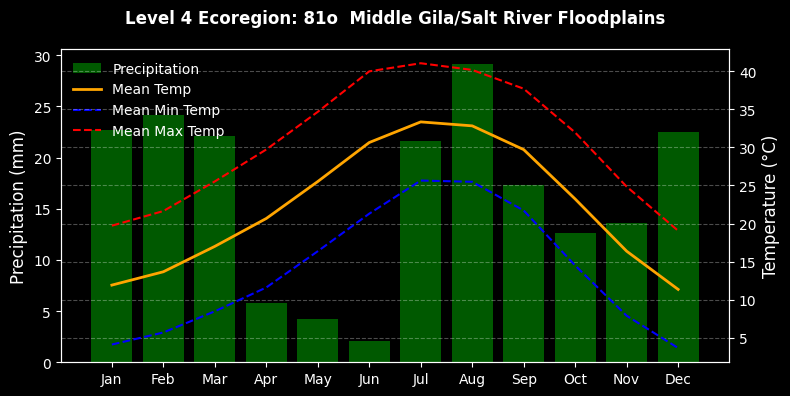

In [13]:
means = df.groupby("Level_4", observed=True)[df.select_dtypes("number").columns].mean().reset_index()

for i in means.Level_4.unique():
    eco = means[means.Level_4 == i]

    mean_temps = eco[mean_temp_cols].values[0]
    min_temps  = eco[min_temp_cols].values[0]
    max_temps  = eco[max_temp_cols].values[0]
    precip     = eco[mean_precip_cols].values[0] 

    months = ['Jan','Feb','Mar','Apr','May','Jun',
              'Jul','Aug','Sep','Oct','Nov','Dec']

    plt.style.use("dark_background")
    fig, ax1 = plt.subplots(figsize=(8,4))

    # Precipitation barplot
    ax1.bar(months, precip, alpha=0.7, color="green", label="Precipitation")
    ax1.set_ylabel("Precipitation (mm)", fontsize=12, color="white")
    ax1.grid(False)

    # Temperature lines
    ax2 = ax1.twinx()
    ax2.plot(months, mean_temps, label="Mean Temp", color="orange", linewidth=2)
    ax2.plot(months, min_temps,  label="Mean Min Temp", color="blue",   linestyle="--")
    ax2.plot(months, max_temps,  label="Mean Max Temp", color="red",    linestyle="--")
    ax2.set_ylabel("Temperature (°C)", fontsize=12, color="white")
    ax2.grid(True, linestyle="--", alpha=0.3)

    fig.suptitle(f"Level 4 Ecoregion: {i}", fontsize=12, weight="bold")
    lines, labels = ax1.get_legend_handles_labels()
    bars, blabels = ax2.get_legend_handles_labels()
    ax1.legend(lines + bars, labels + blabels, loc="upper left", frameon=False)

    plt.tight_layout()
    plt.show()

# Unsupervised learning

## PCA

In [14]:
ecoregions = pd.DataFrame(df[ecoregions])

In [15]:
df.drop(columns = ['latitude', 'longitude'], inplace = True)
X = df.select_dtypes(include="number")
X.shape

(16631, 161)

In [16]:
env_vars = ['jan_tmin', 'feb_tmin', 'mar_tmin', 'apr_tmin', 'may_tmin', 'jun_tmin', 
            'jul_tmin', 'aug_tmin', 'sep_tmin', 'oct_tmin', 'nov_tmin', 'dec_tmin', 'annual_tmin',
            'jan_meant', 'feb_meant', 'mar_meant', 'apr_meant', 'may_meant', 'jun_meant',
            'jul_meant', 'aug_meant', 'sep_meant', 'oct_meant', 'nov_meant', 'dec_meant', 'annual_meant',
            'jan_maxt', 'feb_maxt', 'mar_maxt', 'apr_maxt', 'may_maxt', 'jun_maxt',
            'jul_maxt', 'aug_maxt', 'sep_maxt', 'oct_maxt', 'nov_maxt', 'dec_maxt', 'annual_maxt',
            'jan_dptmean', 'feb_dptmean', 'mar_dptmean', 'apr_dptmean', 'may_dptmean', 'jun_dptmean',
            'jul_dptmean', 'aug_dptmean', 'sep_dptmean', 'oct_dptmean', 'nov_dptmean', 'dec_dptmean', 'annual_dptmean',
            'jan_solar', 'feb_solar', 'mar_solar', 'apr_solar', 'may_solar', 'jun_solar',
            'jul_solar', 'aug_solar', 'sep_solar', 'oct_solar', 'nov_solar', 'dec_solar', 'annual_solar',
            'jan_solarTrans', 'feb_solarTrans', 'mar_solarTrans', 'apr_solarTrans', 'may_solarTrans', 'jun_solarTrans', 
            'jul_solarTrans', 'aug_solarTrans', 'sep_solarTrans', 'oct_solarTrans', 'nov_solarTrans', 'dec_solarTrans', 'annual_solarTrans', 
            'jan_precip', 'feb_precip', 'mar_precip', 'apr_precip', 'may_precip', 'jun_precip',
            'jul_precip', 'aug_precip', 'sep_precip', 'oct_precip', 'nov_precip', 'dec_precip', 'annual_precip',
            'jan_vpdmax', 'feb_vpdmax', 'mar_vpdmax', 'apr_vpdmax', 'may_vpdmax', 'jun_vpdmax',
            'jul_vpdmax', 'aug_vpdmax', 'sep_vpdmax', 'oct_vpdmax', 'nov_vpdmax', 'dec_vpdmax', 'annual_vpdmax',
            'jan_vpdmin', 'feb_vpdmin', 'mar_vpdmin', 'apr_vpdmin', 'may_vpdmin', 'jun_vpdmin',
            'jul_vpdmin', 'aug_vpdmin', 'sep_vpdmin', 'oct_vpdmin', 'nov_vpdmin', 'dec_vpdmin', 'annual_vpdmin',
            'elevation', 'usda_hardiness_temp']

In [17]:
bio_vars = ['BIO1_AnnualMeanTemp', 'BIO2_MeanDiurnalRange', 'BIO5_MaxTempWarmestMonth', 
            'BIO6_MinTempColdestMonth', 'BIO7_TemperatureAnnualRange', 'BIO3_Isothermality', 
            'BIO4_TemperatureSeasonality', 'BIO8_MeanTempWettestQuarter', 'BIO9_MeanTempDriestQuarter', 
            'BIO10_MeanTempWarmestQuarter', 'BIO11_MeanTempColdestQuarter', 'BIO12_AnnualPrecip', 
            'BIO13_PrecipWettestMonth', 'BIO14_PrecipDriestMonth', 'BIO15_PrecipSeasonality', 
            'BIO16_PrecipWettestQuarter', 'BIO17_PrecipDriestQuarter', 'BIO18_PrecipWarmestQuarter', 
            'BIO19_PrecipColdestQuarter', 'elevation', 'usda_hardiness_temp'] 

In [18]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.columns = X.columns

(16631, 15)
0.9909221886166166


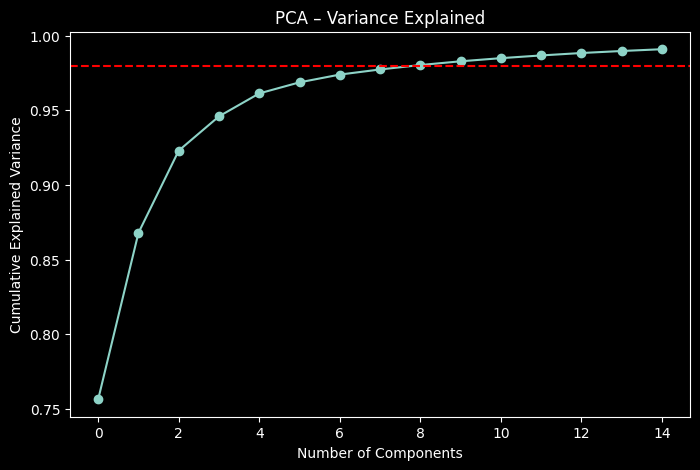

In [19]:
pca_env = PCA(n_components=0.99, random_state=42)
X_pca_env = pca_env.fit_transform(X_scaled[env_vars])
print(X_pca_env.shape)
print(pca_env.explained_variance_ratio_.sum())
X_pca_env = pd.DataFrame(X_pca_env)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_env.explained_variance_ratio_), marker='o')
plt.axhline(0.98, color='red', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA – Variance Explained")
plt.show()

(16631, 7)
0.9902989102427493


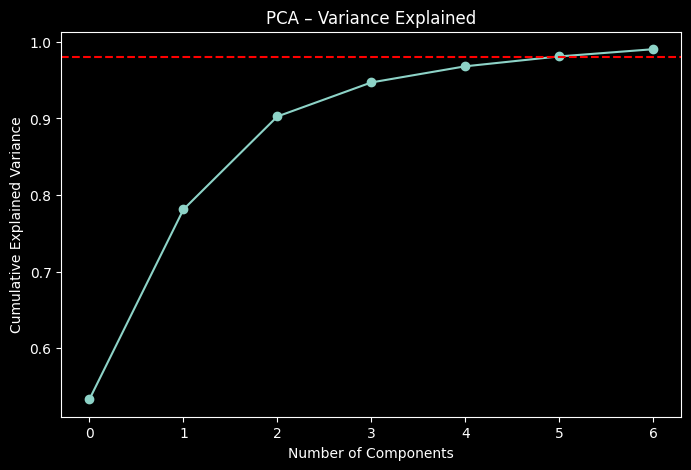

In [20]:
pca_bio = PCA(n_components=0.99, random_state=42)
X_pca_bio = pca_bio.fit_transform(X_scaled[bio_vars])
print(X_pca_bio.shape)
print(pca_bio.explained_variance_ratio_.sum())
X_pca_bio = pd.DataFrame(X_pca_bio)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_bio.explained_variance_ratio_), marker='o')
plt.axhline(0.98, color='red', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA – Variance Explained")
plt.show()

In [21]:
X_pca_env = pd.concat([X_pca_env, ecoregions], axis=1)
X_pca_bio = pd.concat([X_pca_bio, ecoregions], axis=1)

In [22]:
X_pca_env.columns[:-5]

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='object')

In [23]:
X_pca_bio.columns[:-5]

Index([0, 1, 2, 3, 4, 5, 6], dtype='object')

## UMAP environmental vars

In [24]:
X_pca_env.Level_1.value_counts()

Level_1
10  NORTH AMERICAN DESERTS         11040
13  TEMPERATE SIERRAS               3476
12  SOUTHERN SEMIARID HIGHLANDS     2115
Name: count, dtype: int64

In [25]:
umap_landmarks = pd.DataFrame()
for i in X_pca_env.Level_1.unique():
    sample_df = X_pca_env[X_pca_env.Level_1 == i].sample(1000, random_state=42)
    umap_landmarks = pd.concat([umap_landmarks, sample_df])

y = umap_landmarks.Level_1
X_landmarks = umap_landmarks[X_pca_env.columns[:-5]]

In [26]:
umap_model = umap.UMAP(
    n_neighbors=500,      
    min_dist=0.1,        
    n_components=2,      
    metric='euclidean')  # or 'manhattan' / 'cosine' / 'braycurtis' / 'euclidean' / 'correlation'

embedding = umap_model.fit_transform(X_landmarks)

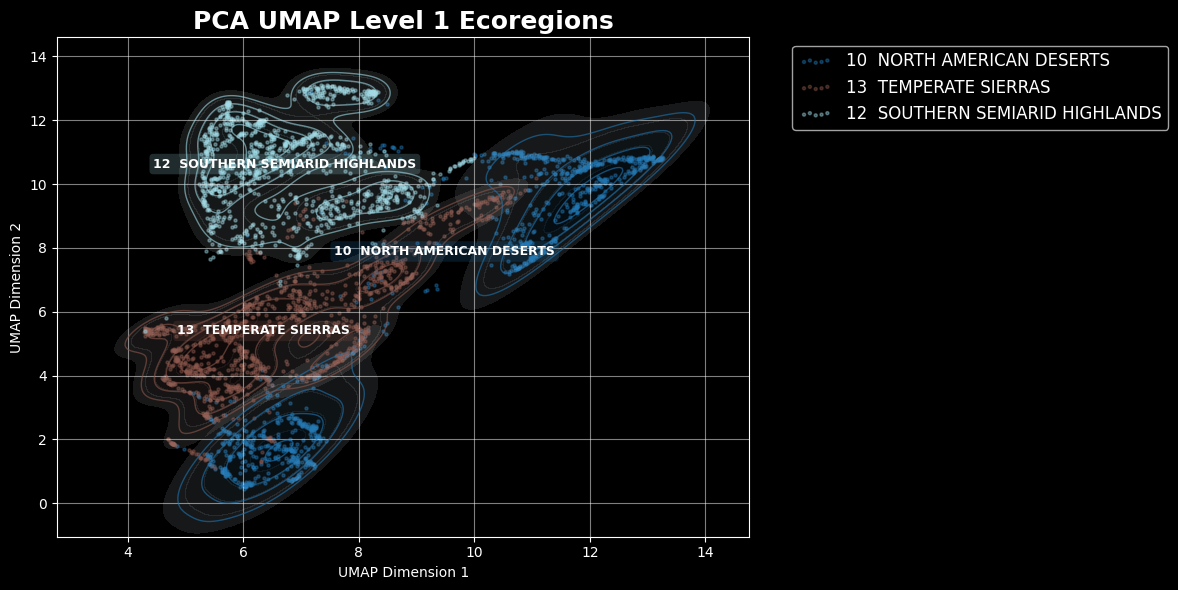

In [27]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

categories = y.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

for cat, color in zip(categories, colors):
    mask = y == cat
    points = embedding[mask].T 
    plt.scatter(points[0], points[1], s=5, alpha=0.4, color=color, label=cat)
    if points.shape[1] > 50:
        kde = gaussian_kde(points, bw_method='scott')  # silverman / scott
        
        # Grid limits (slightly beyond point range)
        x_min, x_max = points[0].min() - 1.5, points[0].max() + 1.5
        y_min, y_max = points[1].min() - 1.5, points[1].max() + 1.5
        xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
        zz = zz / zz.max()  # normalize 0–1 for each category
        
        # Custom color map fading to white
        cmap = LinearSegmentedColormap.from_list("", ["white", color])
        plt.contourf(xx, yy, zz, levels=np.linspace(0.2, 1, 6), cmap=cmap, alpha=0.1)
        plt.contour(xx, yy, zz, levels=[0.3, 0.5, 0.7, 0.9], colors=[color], linewidths=1, alpha=0.6)

    x_mean = np.median(points[0])  # median often more robust than mean
    y_mean = np.median(points[1])
    plt.text(
        x_mean, y_mean, cat,
        fontsize=9, weight="bold", color="white",
        ha="center", va="center",
        bbox=dict(facecolor=color, alpha=0.2, edgecolor="none", boxstyle="round,pad=0.3")
    )

plt.title("PCA UMAP Level 1 Ecoregions", fontsize=18, weight="bold")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, scatterpoints=5)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig(r"docs\umap_ecoregions.png")
plt.show()

In [28]:
X_pca_env.Level_2.value_counts()

Level_2
10.2  WARM DESERTS                     5879
10.1  COLD DESERTS                     5161
13.1  UPPER GILA MOUNTAINS             3476
12.1  WESTERN SIERRA MADRE PIEDMONT    2115
Name: count, dtype: int64

In [29]:
umap_landmarks = pd.DataFrame()
for i in X_pca_env.Level_2.unique():
    sample_df = X_pca_env[X_pca_env.Level_2 == i].sample(1000, random_state=42)
    umap_landmarks = pd.concat([umap_landmarks, sample_df])

y = umap_landmarks.Level_2
X_landmarks = umap_landmarks[X_pca_env.columns[:-5]]

In [30]:
umap_model = umap.UMAP(
    n_neighbors=500,      
    min_dist=0.1,        
    n_components=2,      
    metric='euclidean')  # or 'manhattan' / 'cosine' / 'braycurtis' / 'euclidean' / 'correlation'

embedding = umap_model.fit_transform(X_landmarks)

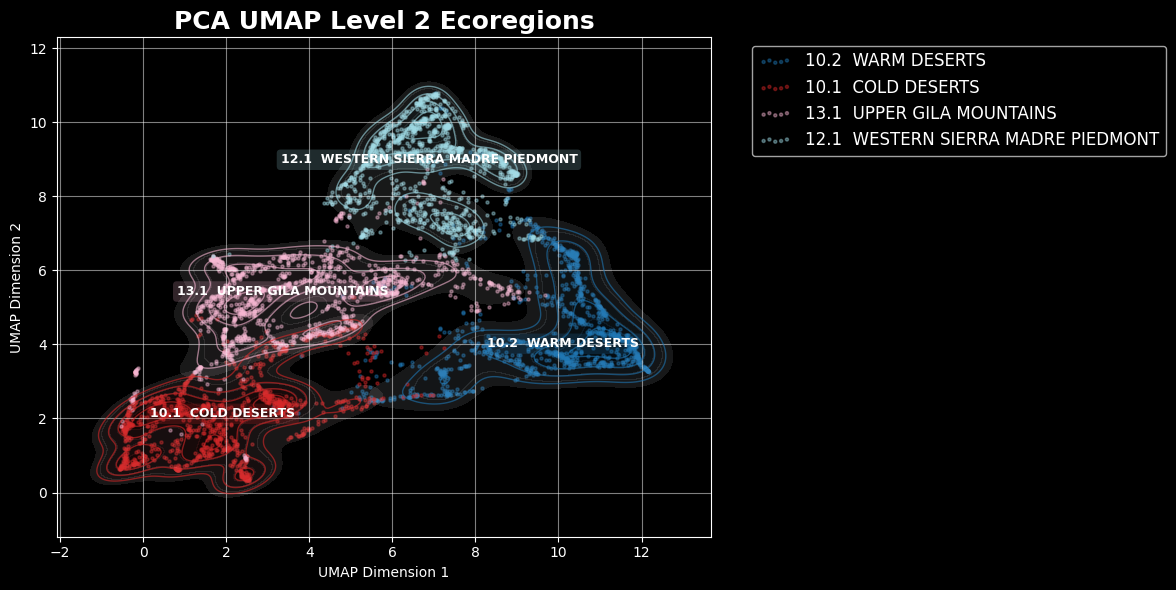

In [31]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

categories = y.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

for cat, color in zip(categories, colors):
    mask = y == cat
    points = embedding[mask].T 
    plt.scatter(points[0], points[1], s=5, alpha=0.4, color=color, label=cat)
    if points.shape[1] > 50:
        kde = gaussian_kde(points, bw_method='scott')  # silverman / scott
        
        # Grid limits (slightly beyond point range)
        x_min, x_max = points[0].min() - 1.5, points[0].max() + 1.5
        y_min, y_max = points[1].min() - 1.5, points[1].max() + 1.5
        xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
        zz = zz / zz.max()  # normalize 0–1 for each category
        
        # Custom color map fading to white
        cmap = LinearSegmentedColormap.from_list("", ["white", color])
        plt.contourf(xx, yy, zz, levels=np.linspace(0.2, 1, 6), cmap=cmap, alpha=0.1)
        plt.contour(xx, yy, zz, levels=[0.3, 0.5, 0.7, 0.9], colors=[color], linewidths=1, alpha=0.6)

    x_mean = np.median(points[0])  # median often more robust than mean
    y_mean = np.median(points[1])
    plt.text(
        x_mean, y_mean, cat,
        fontsize=9, weight="bold", color="white",
        ha="center", va="center",
        bbox=dict(facecolor=color, alpha=0.2, edgecolor="none", boxstyle="round,pad=0.3")
    )

plt.title("PCA UMAP Level 2 Ecoregions", fontsize=18, weight="bold")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, scatterpoints=5)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig(r"docs\umap_ecoregions.png")
plt.show()

In [32]:
X_pca_env.Level_3.unique()

array(['10.2.1  Mojave Basin and Range', '10.1.6  Colorado Plateaus',
       '10.1.7  Arizona/New Mexico Plateau',
       '13.1.1  Arizona/New Mexico Mountains', '10.2.2  Sonoran Desert',
       '12.1.1  Madrean Archipelago', '10.2.4  Chihuahuan Desert'],
      dtype=object)

In [33]:
X_pca_env[X_pca_env.Level_3 != '10.2.4  Chihuahuan Desert'].Level_3.value_counts()

Level_3
10.2.2  Sonoran Desert                  4931
10.1.7  Arizona/New Mexico Plateau      4629
13.1.1  Arizona/New Mexico Mountains    3476
12.1.1  Madrean Archipelago             2115
10.2.1  Mojave Basin and Range           917
10.1.6  Colorado Plateaus                532
Name: count, dtype: int64

In [34]:
umap_landmarks = pd.DataFrame()
for i in X_pca_env[X_pca_env.Level_3 != '10.2.4  Chihuahuan Desert'].Level_3.unique():
    sample_df = X_pca_env[X_pca_env.Level_3 == i].sample(500, random_state=42, replace=True)
    umap_landmarks = pd.concat([umap_landmarks, sample_df])

y = umap_landmarks.Level_3
X_landmarks = umap_landmarks[X_pca_env.columns[:-5]]

In [35]:
umap_model = umap.UMAP(
    n_neighbors=500,      
    min_dist=0.1,        
    n_components=2,      
    metric='euclidean')  # or 'manhattan' / 'cosine' / 'braycurtis' / 'euclidean' / 'correlation'

embedding = umap_model.fit_transform(X_landmarks)

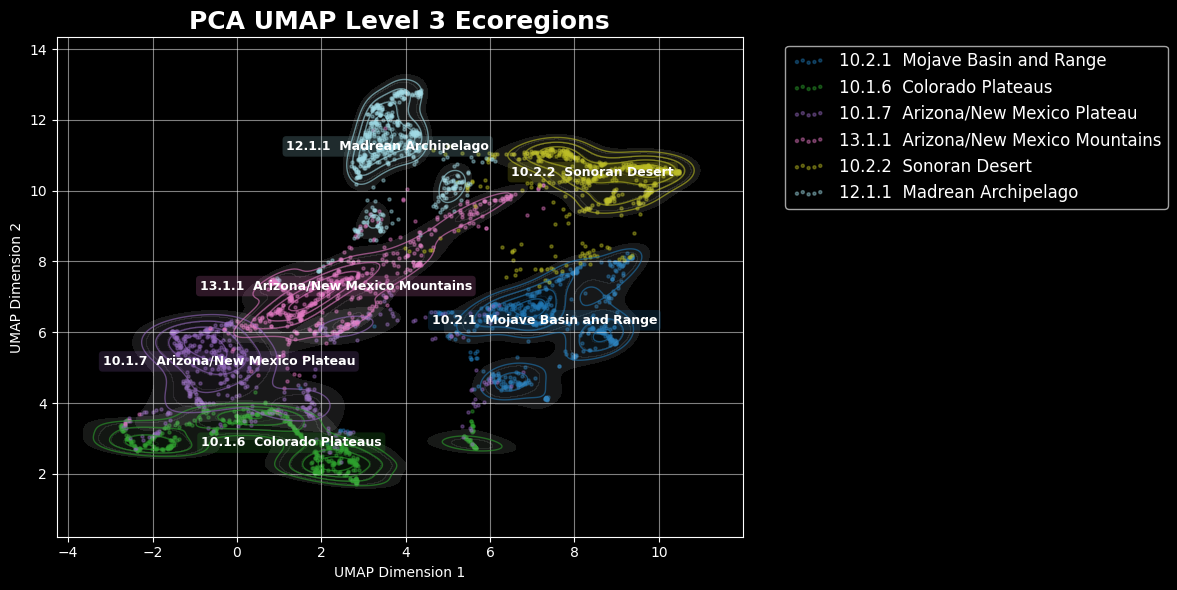

In [36]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

categories = y.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

for cat, color in zip(categories, colors):
    mask = y == cat
    points = embedding[mask].T 
    plt.scatter(points[0], points[1], s=5, alpha=0.4, color=color, label=cat)
    if points.shape[1] > 50:
        kde = gaussian_kde(points, bw_method='scott')  # silverman / scott
        
        # Grid limits (slightly beyond point range)
        x_min, x_max = points[0].min() - 1.5, points[0].max() + 1.5
        y_min, y_max = points[1].min() - 1.5, points[1].max() + 1.5
        xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
        zz = zz / zz.max()  # normalize 0–1 for each category
        
        # Custom color map fading to white
        cmap = LinearSegmentedColormap.from_list("", ["white", color])
        plt.contourf(xx, yy, zz, levels=np.linspace(0.2, 1, 6), cmap=cmap, alpha=0.1)
        plt.contour(xx, yy, zz, levels=[0.3, 0.5, 0.7, 0.9], colors=[color], linewidths=1, alpha=0.6)

    x_mean = np.median(points[0])  # median often more robust than mean
    y_mean = np.median(points[1])
    plt.text(
        x_mean, y_mean, cat,
        fontsize=9, weight="bold", color="white",
        ha="center", va="center",
        bbox=dict(facecolor=color, alpha=0.2, edgecolor="none", boxstyle="round,pad=0.3")
    )

plt.title("PCA UMAP Level 3 Ecoregions", fontsize=18, weight="bold")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, scatterpoints=5)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig(r"docs\umap_ecoregions.png")
plt.show()

In [37]:
top_10 = X_pca_env.Level_4.value_counts().head(10).index

In [68]:
umap_landmarks = pd.DataFrame()
for i in top_10:
    sample_df = X_pca_env[X_pca_env.Level_4 == i].sample(500, random_state=42, replace=True)
    umap_landmarks = pd.concat([umap_landmarks, sample_df])

y = umap_landmarks.Level_4
X_landmarks = umap_landmarks[X_pca_env.columns[:-5]]

In [69]:
umap_model = umap.UMAP(
    n_neighbors=200,      
    min_dist=0.1,       
    n_components=2,      
    metric='euclidean')  # or 'manhattan' / 'cosine' / 'braycurtis' / 'euclidean' / 'correlation'

embedding = umap_model.fit_transform(X_landmarks)

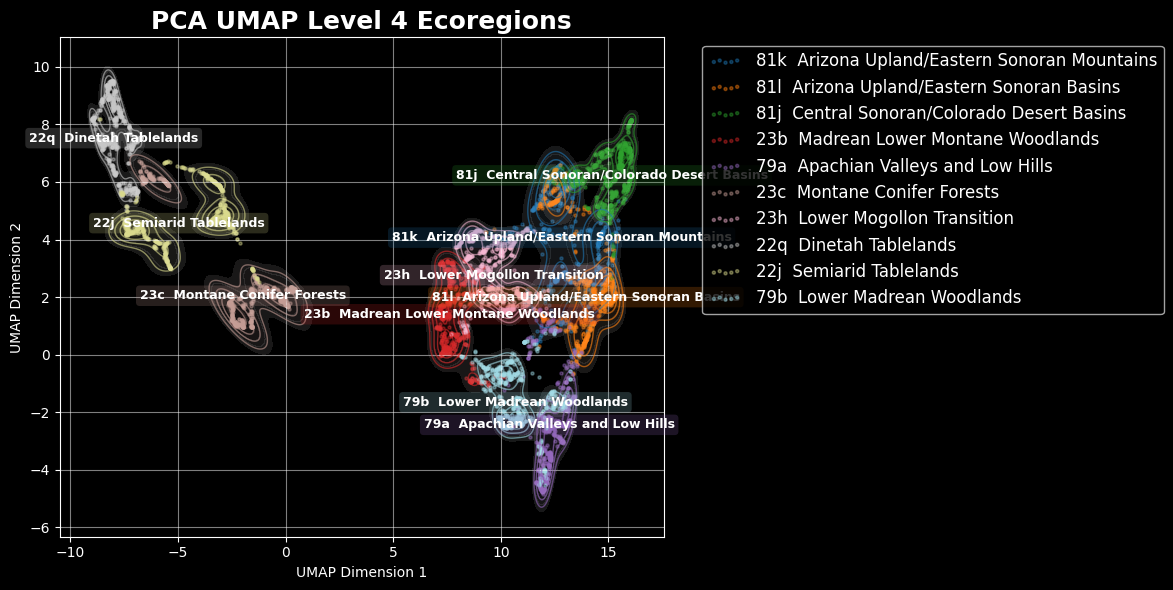

In [70]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

categories = y.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

for cat, color in zip(categories, colors):
    mask = y == cat
    points = embedding[mask].T 
    plt.scatter(points[0], points[1], s=5, alpha=0.4, color=color, label=cat)
    if points.shape[1] > 50:
        kde = gaussian_kde(points, bw_method='scott')  # silverman / scott
        
        # Grid limits (slightly beyond point range)
        x_min, x_max = points[0].min() - 1.5, points[0].max() + 1.5
        y_min, y_max = points[1].min() - 1.5, points[1].max() + 1.5
        xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
        zz = zz / zz.max()  # normalize 0–1 for each category
        
        # Custom color map fading to white
        cmap = LinearSegmentedColormap.from_list("", ["white", color])
        plt.contourf(xx, yy, zz, levels=np.linspace(0.2, 1, 6), cmap=cmap, alpha=0.1)
        plt.contour(xx, yy, zz, levels=[0.3, 0.5, 0.7, 0.9], colors=[color], linewidths=1, alpha=0.6)

    x_mean = np.median(points[0])  # median often more robust than mean
    y_mean = np.median(points[1])
    plt.text(
        x_mean, y_mean, cat,
        fontsize=9, weight="bold", color="white",
        ha="center", va="center",
        bbox=dict(facecolor=color, alpha=0.2, edgecolor="none", boxstyle="round,pad=0.3")
    )

plt.title("PCA UMAP Level 4 Ecoregions", fontsize=18, weight="bold")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, scatterpoints=5)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig(r"docs\umap_ecoregions.png")
plt.show()

In [60]:
X_pca_env.ECO_NAME.value_counts()

ECO_NAME
Colorado Plateau shrublands                 5190
Sonoran desert                              4932
Arizona Mountains forests                   3477
Chihuahuan desert                           1761
Mojave desert                                889
Sierra Madre Occidental pine-oak forests     382
Name: count, dtype: int64

In [64]:
umap_landmarks = pd.DataFrame()
for i in X_pca_env.ECO_NAME.unique():
    sample_df = X_pca_env[X_pca_env.ECO_NAME == i].sample(500, random_state=42, replace=True)
    umap_landmarks = pd.concat([umap_landmarks, sample_df])

y = umap_landmarks.ECO_NAME
X_landmarks = umap_landmarks[X_pca_env.columns[:-5]]

In [65]:
umap_model = umap.UMAP(
    n_neighbors=500,      
    min_dist=0.1,        
    n_components=2,      
    metric='euclidean')  # or 'manhattan' / 'cosine' / 'braycurtis' / 'euclidean' / 'correlation'

embedding = umap_model.fit_transform(X_landmarks)

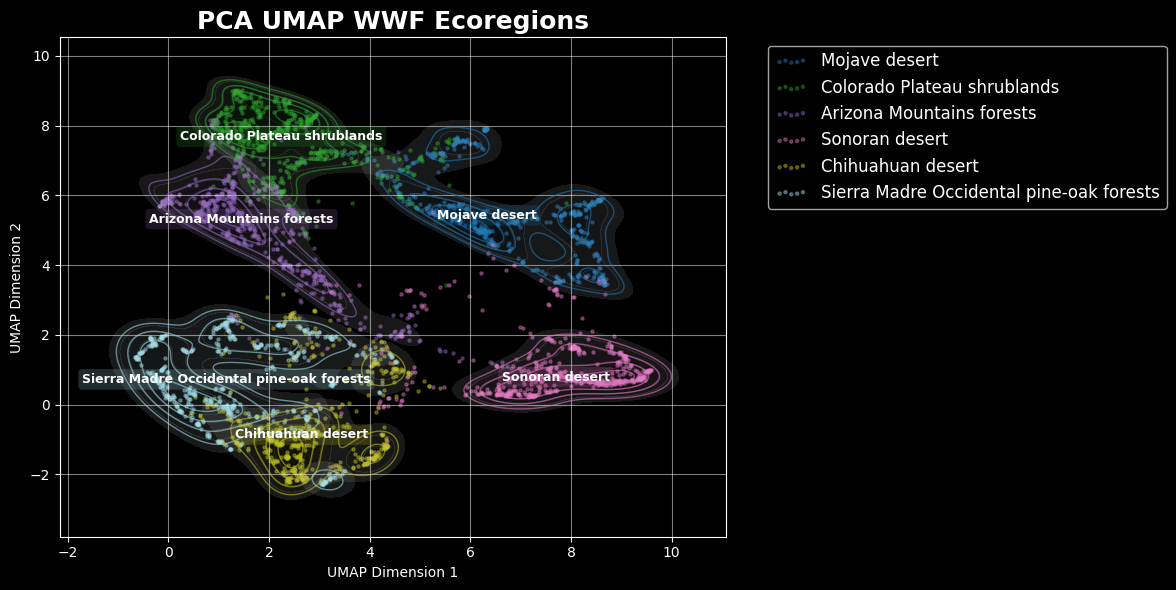

In [66]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

categories = y.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

for cat, color in zip(categories, colors):
    mask = y == cat
    points = embedding[mask].T 
    plt.scatter(points[0], points[1], s=5, alpha=0.4, color=color, label=cat)
    if points.shape[1] > 50:
        kde = gaussian_kde(points, bw_method='scott')  # silverman / scott
        
        # Grid limits (slightly beyond point range)
        x_min, x_max = points[0].min() - 1.5, points[0].max() + 1.5
        y_min, y_max = points[1].min() - 1.5, points[1].max() + 1.5
        xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
        zz = zz / zz.max()  # normalize 0–1 for each category
        
        # Custom color map fading to white
        cmap = LinearSegmentedColormap.from_list("", ["white", color])
        plt.contourf(xx, yy, zz, levels=np.linspace(0.2, 1, 6), cmap=cmap, alpha=0.1)
        plt.contour(xx, yy, zz, levels=[0.3, 0.5, 0.7, 0.9], colors=[color], linewidths=1, alpha=0.6)

    x_mean = np.median(points[0])  # median often more robust than mean
    y_mean = np.median(points[1])
    plt.text(
        x_mean, y_mean, cat,
        fontsize=9, weight="bold", color="white",
        ha="center", va="center",
        bbox=dict(facecolor=color, alpha=0.2, edgecolor="none", boxstyle="round,pad=0.3")
    )

plt.title("PCA UMAP WWF Ecoregions", fontsize=18, weight="bold")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, scatterpoints=5)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig(r"docs\umap_ecoregions.png")
plt.show()

## UMAP BIOs

In [45]:
umap_landmarks = pd.DataFrame()
for i in X_pca_bio.Level_1.unique():
    sample_df = X_pca_bio[X_pca_bio.Level_1 == i].sample(1000, random_state=42)
    umap_landmarks = pd.concat([umap_landmarks, sample_df])

y = umap_landmarks.Level_1
X_landmarks = umap_landmarks[X_pca_bio.columns[:-5]]

In [46]:
umap_model = umap.UMAP(
    n_neighbors=500,      
    min_dist=0.1,        
    n_components=2,      
    metric='euclidean')  # or 'manhattan' / 'cosine' / 'braycurtis' / 'euclidean' / 'correlation'

embedding = umap_model.fit_transform(X_landmarks)

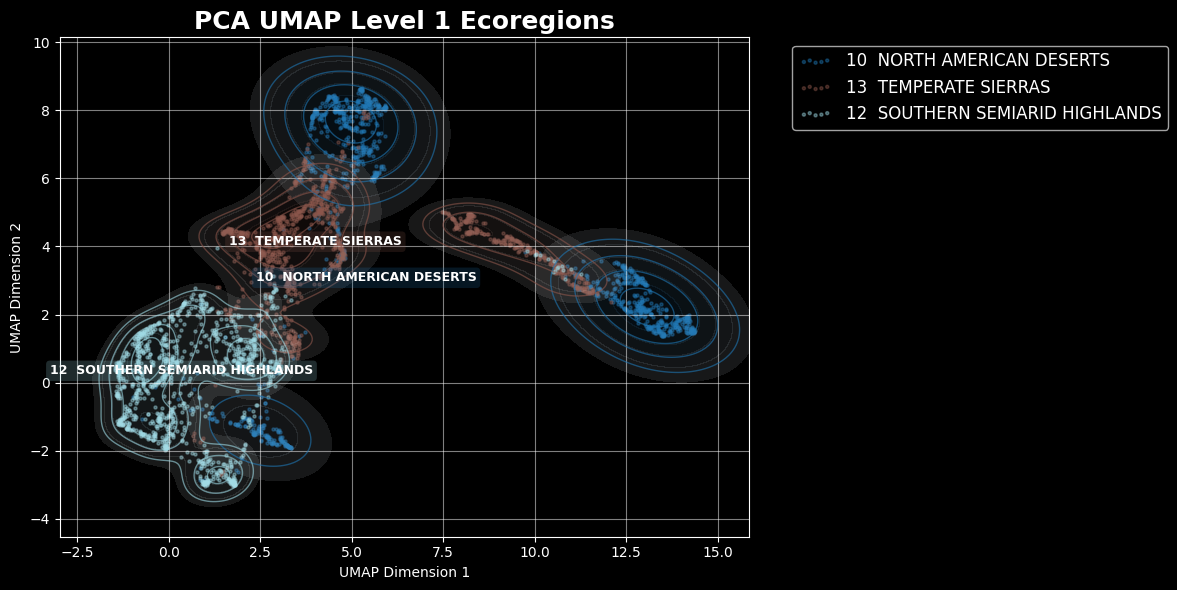

In [47]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

categories = y.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

for cat, color in zip(categories, colors):
    mask = y == cat
    points = embedding[mask].T 
    plt.scatter(points[0], points[1], s=5, alpha=0.4, color=color, label=cat)
    if points.shape[1] > 50:
        kde = gaussian_kde(points, bw_method='scott')  # silverman / scott
        
        # Grid limits (slightly beyond point range)
        x_min, x_max = points[0].min() - 1.5, points[0].max() + 1.5
        y_min, y_max = points[1].min() - 1.5, points[1].max() + 1.5
        xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
        zz = zz / zz.max()  # normalize 0–1 for each category
        
        # Custom color map fading to white
        cmap = LinearSegmentedColormap.from_list("", ["white", color])
        plt.contourf(xx, yy, zz, levels=np.linspace(0.2, 1, 6), cmap=cmap, alpha=0.1)
        plt.contour(xx, yy, zz, levels=[0.3, 0.5, 0.7, 0.9], colors=[color], linewidths=1, alpha=0.6)

    x_mean = np.median(points[0])  # median often more robust than mean
    y_mean = np.median(points[1])
    plt.text(
        x_mean, y_mean, cat,
        fontsize=9, weight="bold", color="white",
        ha="center", va="center",
        bbox=dict(facecolor=color, alpha=0.2, edgecolor="none", boxstyle="round,pad=0.3")
    )

plt.title("PCA UMAP Level 1 Ecoregions", fontsize=18, weight="bold")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, scatterpoints=5)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig(r"docs\umap_ecoregions.png")
plt.show()

In [48]:
umap_landmarks = pd.DataFrame()
for i in X_pca_bio.Level_2.unique():
    sample_df = X_pca_bio[X_pca_bio.Level_2 == i].sample(1000, random_state=42)
    umap_landmarks = pd.concat([umap_landmarks, sample_df])

y = umap_landmarks.Level_2
X_landmarks = umap_landmarks[X_pca_bio.columns[:-5]]

In [49]:
umap_model = umap.UMAP(
    n_neighbors=500,      
    min_dist=0.1,        
    n_components=2,      
    metric='euclidean')  # or 'manhattan' / 'cosine' / 'braycurtis' / 'euclidean' / 'correlation'

embedding = umap_model.fit_transform(X_landmarks)

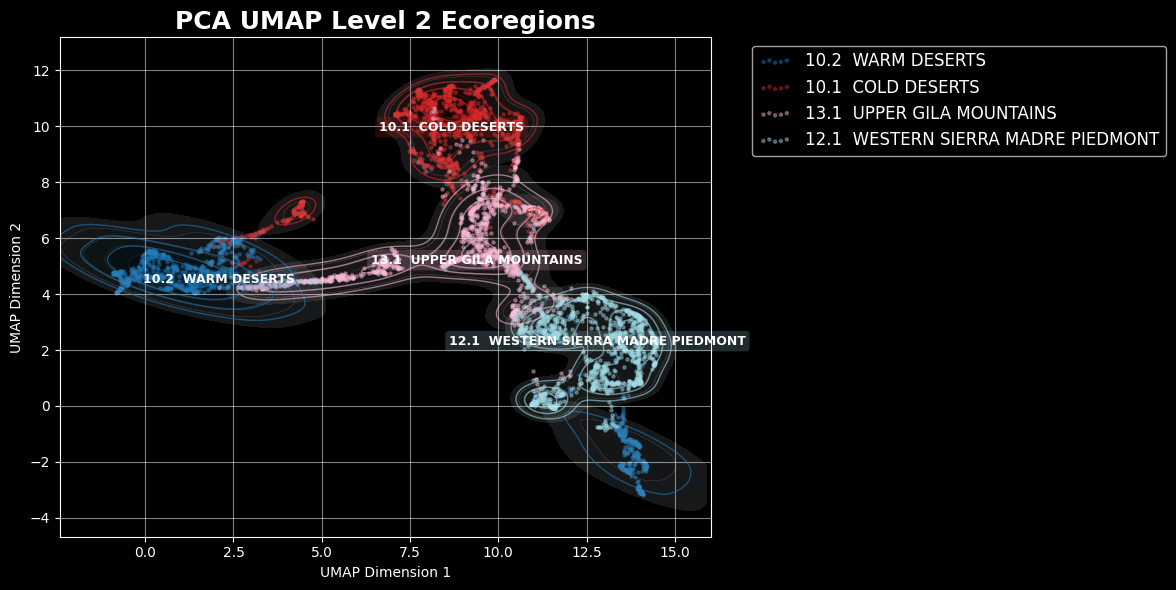

In [50]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

categories = y.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

for cat, color in zip(categories, colors):
    mask = y == cat
    points = embedding[mask].T 
    plt.scatter(points[0], points[1], s=5, alpha=0.4, color=color, label=cat)
    if points.shape[1] > 50:
        kde = gaussian_kde(points, bw_method='scott')  # silverman / scott
        
        # Grid limits (slightly beyond point range)
        x_min, x_max = points[0].min() - 1.5, points[0].max() + 1.5
        y_min, y_max = points[1].min() - 1.5, points[1].max() + 1.5
        xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
        zz = zz / zz.max()  # normalize 0–1 for each category
        
        # Custom color map fading to white
        cmap = LinearSegmentedColormap.from_list("", ["white", color])
        plt.contourf(xx, yy, zz, levels=np.linspace(0.2, 1, 6), cmap=cmap, alpha=0.1)
        plt.contour(xx, yy, zz, levels=[0.3, 0.5, 0.7, 0.9], colors=[color], linewidths=1, alpha=0.6)

    x_mean = np.median(points[0])  # median often more robust than mean
    y_mean = np.median(points[1])
    plt.text(
        x_mean, y_mean, cat,
        fontsize=9, weight="bold", color="white",
        ha="center", va="center",
        bbox=dict(facecolor=color, alpha=0.2, edgecolor="none", boxstyle="round,pad=0.3")
    )

plt.title("PCA UMAP Level 2 Ecoregions", fontsize=18, weight="bold")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, scatterpoints=5)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig(r"docs\umap_ecoregions.png")
plt.show()

In [51]:
umap_landmarks = pd.DataFrame()
for i in X_pca_env[X_pca_bio.Level_3 != '10.2.4  Chihuahuan Desert'].Level_3.unique():
    sample_df = X_pca_bio[X_pca_bio.Level_3 == i].sample(500, random_state=42, replace=True)
    umap_landmarks = pd.concat([umap_landmarks, sample_df])

y = umap_landmarks.Level_3
X_landmarks = umap_landmarks[X_pca_bio.columns[:-5]]

In [52]:
umap_model = umap.UMAP(
    n_neighbors=500,      
    min_dist=0.1,        
    n_components=2,      
    metric='euclidean')  # or 'manhattan' / 'cosine' / 'braycurtis' / 'euclidean' / 'correlation'

embedding = umap_model.fit_transform(X_landmarks)

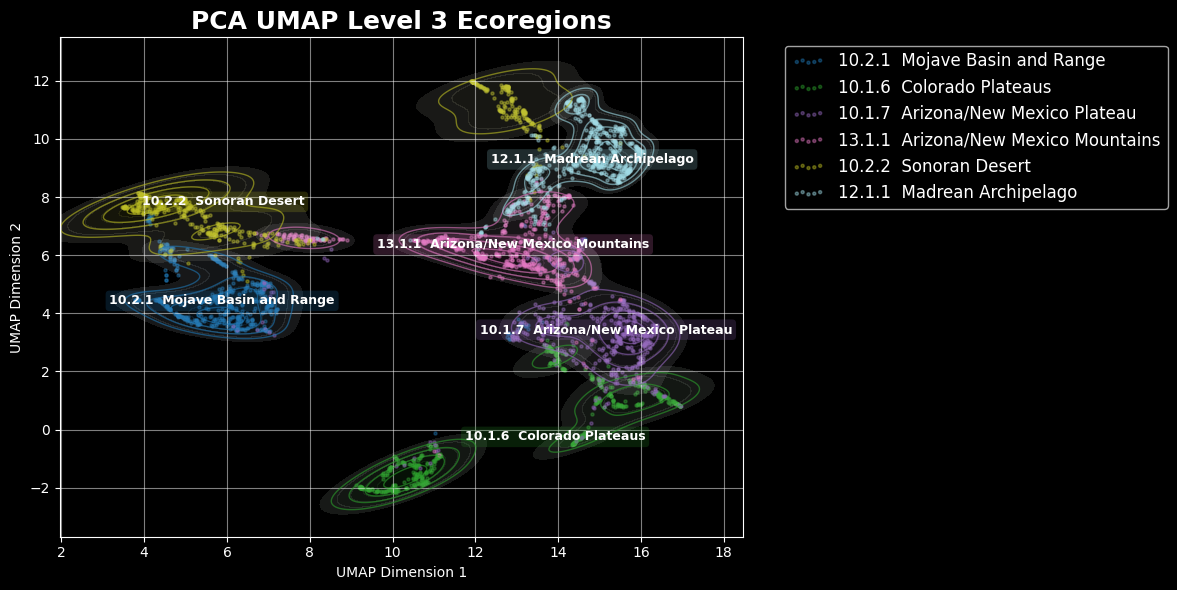

In [53]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

categories = y.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

for cat, color in zip(categories, colors):
    mask = y == cat
    points = embedding[mask].T 
    plt.scatter(points[0], points[1], s=5, alpha=0.4, color=color, label=cat)
    if points.shape[1] > 50:
        kde = gaussian_kde(points, bw_method='scott')  # silverman / scott
        
        # Grid limits (slightly beyond point range)
        x_min, x_max = points[0].min() - 1.5, points[0].max() + 1.5
        y_min, y_max = points[1].min() - 1.5, points[1].max() + 1.5
        xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
        zz = zz / zz.max()  # normalize 0–1 for each category
        
        # Custom color map fading to white
        cmap = LinearSegmentedColormap.from_list("", ["white", color])
        plt.contourf(xx, yy, zz, levels=np.linspace(0.2, 1, 6), cmap=cmap, alpha=0.1)
        plt.contour(xx, yy, zz, levels=[0.3, 0.5, 0.7, 0.9], colors=[color], linewidths=1, alpha=0.6)

    x_mean = np.median(points[0])  # median often more robust than mean
    y_mean = np.median(points[1])
    plt.text(
        x_mean, y_mean, cat,
        fontsize=9, weight="bold", color="white",
        ha="center", va="center",
        bbox=dict(facecolor=color, alpha=0.2, edgecolor="none", boxstyle="round,pad=0.3")
    )

plt.title("PCA UMAP Level 3 Ecoregions", fontsize=18, weight="bold")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, scatterpoints=5)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig(r"docs\umap_ecoregions.png")
plt.show()

In [74]:
umap_landmarks = pd.DataFrame()
for i in top_10:
    sample_df = X_pca_env[X_pca_env.Level_4 == i].sample(500, random_state=42, replace=True)
    umap_landmarks = pd.concat([umap_landmarks, sample_df])

y = umap_landmarks.Level_4
X_landmarks = umap_landmarks[X_pca_env.columns[:-5]]

In [75]:
umap_model = umap.UMAP(
    n_neighbors=500,      
    min_dist=0.1,        
    n_components=2,      
    metric='euclidean')  # or 'manhattan' / 'cosine' / 'braycurtis' / 'euclidean' / 'correlation'

embedding = umap_model.fit_transform(X_landmarks)

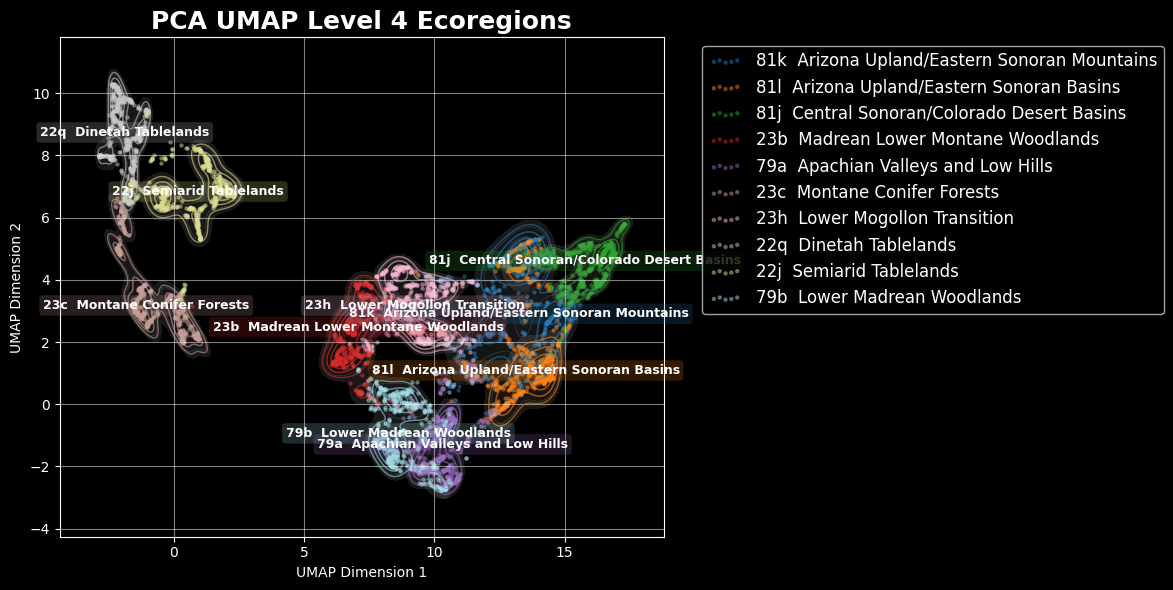

In [76]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

categories = y.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

for cat, color in zip(categories, colors):
    mask = y == cat
    points = embedding[mask].T 
    plt.scatter(points[0], points[1], s=5, alpha=0.4, color=color, label=cat)
    if points.shape[1] > 50:
        kde = gaussian_kde(points, bw_method='scott')  # silverman / scott
        
        # Grid limits (slightly beyond point range)
        x_min, x_max = points[0].min() - 1.5, points[0].max() + 1.5
        y_min, y_max = points[1].min() - 1.5, points[1].max() + 1.5
        xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
        zz = zz / zz.max()  # normalize 0–1 for each category
        
        # Custom color map fading to white
        cmap = LinearSegmentedColormap.from_list("", ["white", color])
        plt.contourf(xx, yy, zz, levels=np.linspace(0.2, 1, 6), cmap=cmap, alpha=0.1)
        plt.contour(xx, yy, zz, levels=[0.3, 0.5, 0.7, 0.9], colors=[color], linewidths=1, alpha=0.6)

    x_mean = np.median(points[0])  # median often more robust than mean
    y_mean = np.median(points[1])
    plt.text(
        x_mean, y_mean, cat,
        fontsize=9, weight="bold", color="white",
        ha="center", va="center",
        bbox=dict(facecolor=color, alpha=0.2, edgecolor="none", boxstyle="round,pad=0.3")
    )

plt.title("PCA UMAP Level 4 Ecoregions", fontsize=18, weight="bold")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, scatterpoints=5)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig(r"docs\umap_ecoregions.png")
plt.show()

In [71]:
umap_landmarks = pd.DataFrame()
for i in X_pca_bio.ECO_NAME.unique():
    sample_df = X_pca_bio[X_pca_bio.ECO_NAME == i].sample(500, random_state=42, replace=True)
    umap_landmarks = pd.concat([umap_landmarks, sample_df])

y = umap_landmarks.ECO_NAME
X_landmarks = umap_landmarks[X_pca_bio.columns[:-5]]

In [72]:
umap_model = umap.UMAP(
    n_neighbors=500,      
    min_dist=0.1,        
    n_components=2,      
    metric='euclidean')  # or 'manhattan' / 'cosine' / 'braycurtis' / 'euclidean' / 'correlation'

embedding = umap_model.fit_transform(X_landmarks)

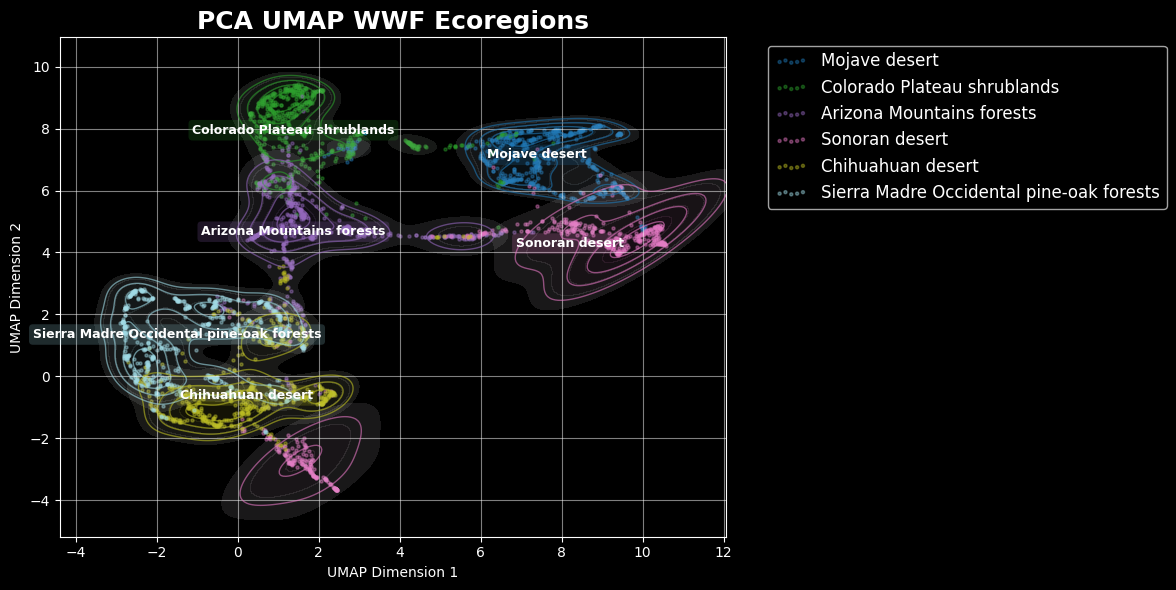

In [73]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

categories = y.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

for cat, color in zip(categories, colors):
    mask = y == cat
    points = embedding[mask].T 
    plt.scatter(points[0], points[1], s=5, alpha=0.4, color=color, label=cat)
    if points.shape[1] > 50:
        kde = gaussian_kde(points, bw_method='scott')  # silverman / scott
        
        # Grid limits (slightly beyond point range)
        x_min, x_max = points[0].min() - 1.5, points[0].max() + 1.5
        y_min, y_max = points[1].min() - 1.5, points[1].max() + 1.5
        xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
        zz = zz / zz.max()  # normalize 0–1 for each category
        
        # Custom color map fading to white
        cmap = LinearSegmentedColormap.from_list("", ["white", color])
        plt.contourf(xx, yy, zz, levels=np.linspace(0.2, 1, 6), cmap=cmap, alpha=0.1)
        plt.contour(xx, yy, zz, levels=[0.3, 0.5, 0.7, 0.9], colors=[color], linewidths=1, alpha=0.6)

    x_mean = np.median(points[0])  # median often more robust than mean
    y_mean = np.median(points[1])
    plt.text(
        x_mean, y_mean, cat,
        fontsize=9, weight="bold", color="white",
        ha="center", va="center",
        bbox=dict(facecolor=color, alpha=0.2, edgecolor="none", boxstyle="round,pad=0.3")
    )

plt.title("PCA UMAP WWF Ecoregions", fontsize=18, weight="bold")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, scatterpoints=5)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig(r"docs\umap_ecoregions.png")
plt.show()

In [77]:
df.Level_1.value_counts()

Level_1
10  NORTH AMERICAN DESERTS         11040
13  TEMPERATE SIERRAS               3476
12  SOUTHERN SEMIARID HIGHLANDS     2115
Name: count, dtype: int64

In [81]:
df[df.Level_1 == '10  NORTH AMERICAN DESERTS'].Level_2.value_counts()

Level_2
10.2  WARM DESERTS    5879
10.1  COLD DESERTS    5161
Name: count, dtype: int64

In [82]:
df[df.Level_1 == '10  NORTH AMERICAN DESERTS'].Level_3.value_counts()

Level_3
10.2.2  Sonoran Desert                4931
10.1.7  Arizona/New Mexico Plateau    4629
10.2.1  Mojave Basin and Range         917
10.1.6  Colorado Plateaus              532
10.2.4  Chihuahuan Desert               31
Name: count, dtype: int64

In [83]:
df[df.Level_1 == '10  NORTH AMERICAN DESERTS'].Level_4.value_counts()

Level_4
81j  Central Sonoran/Colorado Desert Basins            1272
81l  Arizona Upland/Eastern Sonoran Basins             1231
81k  Arizona Upland/Eastern Sonoran Mountains          1098
22q  Dinetah Tablelands                                 618
22o  Northeast Arizona Shrub-Grasslands                 553
22u  Kaibito/Moenkopi Sandy Plateaus                    469
22j  Semiarid Tablelands                                422
81n  Gila/Salt Intermediate Basins                      382
81i  Central Sonoran/Colorado Desert Mountains          378
22p  Little Colorado Valley/Painted Desert              320
14a  Eastern Mojave Basins                              313
22z  Chino/Coconino Grasslands and Shrubsteppe          309
22aa  Hualapai/Coconino Woodlands                       293
23h  Lower Mogollon Transition                          289
22t  Chinle Valley and Mesas                            281
14b  Eastern Mojave Low Ranges and Arid Footslopes      265
22x  Arizona Strip Plateaus     